### I. Problem Statement

As an analyst with MyHome, the aim of this study is to create a regression model to predict home sale prices based on the features of the property. And we would like to recommend top 4 features of the housing that can fetch higher sale prices for residential properties

### II. Background

Having property is a milestone for every adult. But most people do not know what to look out for when they buy a property. In recent [study](https://www.cbsnews.com/news/home-house-prices-mortgage-rates-moodys-mark-zandi/) by Moody Analytics, 97% of residential properties are overvalued across the US. In other [study](https://www.cnbc.com/2022/05/01/survey-majority-of-homeowners-have-regrets.html), 20% of property buyer having regret on underestimating the cost of purchasing home. Thus, it is very important to know what you get for what you pay.

Meanwhile, if you have own a house and when you trying to sell it. Most of the time, the seller do not know how to price the property and tend to based on the trend of the property price around the neighborhood. If they are fortunate, they might sell at a fair value. While the unfortunate one, suffers from undervaluing their own property.

MyHome is an online property listing platform that connects home sellers with potential buyers. The website also provides data-driven recommendations on price trends based on details of the listings to help users optimise their bid/sell prices.

Based on an [article](https://homeia.com/10-important-features-to-consider-when-buying-a-house/), this are the top 10 features that is important when buying home:
1. Location
2. Lot Area
3. Number of Bedrooms
4. Number of Bathrooms
5. Kitchen Layout
6. Home Appliances Quality
7. Age of the House
8. **Price**
9. Seller's incentive
10. Maintenance Mode

Therefore, we will analyse and find out if those features is considered some of the high price features based on the dataset


### III. Selected Datasets

We will be using Ames Housing Data Set that has transaction details at Ames, IOWA for the period of 2006 to 2010. The dataset is split into two sections:
* [`train.csv`](datasets/train.csv): Transaction details for housing in Ames from 2006-2010 as a train set
* [`test.csv`](datasets/test.csv): Remaining transaction details for housing in Ames from 2006-2010 as a test set

### IV. Importing Train Dataset

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
# load datasets

train_data = pd.read_csv('datasets/train.csv', keep_default_na=False, na_values="")

# set the max columns to none
pd.set_option('display.max_columns', None)

train_data.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NA,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NA,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NA,NA,NA,0,3,2010,WD,138500


In [3]:
#set the SalePrice as the target data
y_train = train_data['SalePrice']

In [4]:
train_data.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [5]:
train_data.shape

(2051, 81)

### 1. Handling Missing Values and Data Type

In [6]:
# check for missing data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            2051 non-null   object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

#### 1.1 Lot Frontage

In [7]:
# display row where Mas Vnr Type is null
train_data[train_data['Lot Frontage'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500
7,145,535154050,20,RL,NaN,12160,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,Plywood,Plywood,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,Rec,1000.0,Unf,0.0,188.0,1188.0,GasA,Fa,Y,SBrkr,1188,0,0,1188,1.0,0.0,1,0,3,1,TA,6,Typ,0,NA,Attchd,1959.0,RFn,2.0,531.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,5,1952,1952,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,292.0,Unf,0.0,632.0,924.0,GasA,TA,Y,SBrkr,924,0,0,924,0.0,0.0,1,0,2,1,TA,6,Typ,0,NA,Detchd,1952.0,Unf,1.0,420.0,TA,TA,Y,0,324,0,0,0,0,NA,MnPrv,Shed,400,6,2007,WD,112500
23,12,527165230,20,RL,NaN,7980,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,NA,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,NA,GdPrv,Shed,500,3,2010,WD,185000
27,1534,909277040,50,RL,NaN,11700,Pave,Grvl,IR1,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,5,6,1937,1995,Gable,CompShg,WdShing,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,606.0,Unf,0.0,336.0,942.0,GasA,Ex,Y,SBrkr,1265,673,0,1938,0.0,0.0,2,0,4,1,Gd,7,Min2,1,Gd,Detchd,1937.0,Unf,1.0,240.0,TA,TA,Y,0,40,0,0,0,0,NA,NA,NA,0,7,2008,WD,198000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,560,532376110,20,RL,NaN,7791,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,RRAe,Norm,1Fam,1Story,5,8,1963,1995,Gable,CompShg,Plywood,Plywood,None,0.0,Gd,Gd,CBlock,TA,TA,No,ALQ,624.0,Unf,0.0,288.0,912.0,GasA,Ex,Y,SBrkr,912,0,0,912,1.0,0.0,1,0,3,1,Gd,6,Typ,0,NA,Attchd,1963.0,RFn,1.0,300.0,TA,TA,Y,0,0,0,0,0,0,NA,GdWo,NA,0,10,2009,WD,129000
2022,2872,909475020,20,RL,NaN,16381,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,5,1969,1969,Gable,CompShg,Plywood,Plywood,BrkFace,312.0,Gd,Gd,CBlock,TA,TA,Av,Rec,1110.0,Unf,0.0,734.0,1844.0,GasA,Gd,Y,SBrkr,1844,0,0,1844,1.0,0.0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,1969.0,RFn,2.0,540.0,TA,TA,Y,0,73,216,0,0,0,NA,NA,NA,0,12,2006,WD,223000
2028,2526,534127190,20,RL,NaN,20781,Pave,NA,IR2,Lvl,AllPub,CulDSac,Gtl,NWAmes,PosN,Norm,1Fam,1Story,7,7,1968,2003,Hip,CompShg,BrkFace,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,297.0,Rec,68.0,1203.0,1568.0,GasA,TA,Y,SBrkr,2156,0,0,2156,0.0,0.0,2,0,3,1,TA,9,Typ,1,Gd,Attchd,1968.0,RFn,2.0,508.0,Gd,TA,Y,0,80,0,290,0,0,NA,NA

**_Remark_**: There is number of missing values for Lot Frontage, we will add in the value based on the mean of the Lot Frontage and the lot shape

In [8]:
# To obtain the mean of the lot frontage based on the lot shape
grouped_frontage = train_data['Lot Frontage'].groupby(train_data['Lot Shape']).mean().round(2)
grouped_frontage

Lot Shape
IR1     74.58
IR2     59.42
IR3    115.67
Reg     66.97
Name: Lot Frontage, dtype: float64

In [9]:
# Function to set the lot frontage 
def SetLotFrontage(frontage, shape):
    if np.isnan(frontage):
        return grouped_frontage[shape]
    else:
        return frontage

# apply the function to lot frontage column    
train_data['Lot Frontage'] = train_data.apply(lambda df: SetLotFrontage(df['Lot Frontage'], df['Lot Shape']), axis= 1)

# check if there is still NaN value
train_data['Lot Frontage'].isnull().sum()

0

#### 1.2 Mas Vnr Type and Mas Vnr Area

In [10]:
# display row where Mas Vnr Type is null
train_data[train_data['Mas Vnr Type'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
22,2393,528142010,60,RL,103.00,12867,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2006,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Ex,TA,Av,Unf,0.0,Unf,0.0,1209.0,1209.0,GasA,Ex,Y,SBrkr,1209,1044,0,2253,0.0,0.0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2005.0,Fin,2.0,575.0,TA,TA,Y,243,142,0,0,0,0,NA,NA,NA,0,7,2006,New,344133
41,2383,528110050,20,RL,107.00,13891,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386.0,Unf,0.0,690.0,2076.0,GasA,Ex,Y,SBrkr,2076,0,0,2076,1.0,0.0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3.0,850.0,TA,TA,Y,216,229,0,0,0,0,NA,NA,NA,0,9,2006,New,465000
86,539,531371050,20,RL,67.00,10083,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833.0,Unf,0.0,343.0,1176.0,GasA,Ex,Y,SBrkr,1200,0,0,1200,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NA,Attchd,2003.0,RFn,2.0,555.0,TA,TA,Y,0,41,0,0,0,0,NA,NA,NA,0,8,2009,WD,184900
212,518,528458020,20,FV,90.00,7993,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1436.0,1436.0,GasA,Ex,Y,SBrkr,1436,0,0,1436,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NA,Attchd,2008.0,Fin,2.0,529.0,TA,TA,Y,0,121,0,0,0,0,NA,NA,NA,0,10,2009,New,225000
276,2824,908130020,20,RL,75.00,8050,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,TA,TA,PConc,Gd,TA,Av,GLQ,475.0,ALQ,297.0,142.0,914.0,GasA,Ex,Y,SBrkr,914,0,0,914,1.0,0.0,1,0,2,1,Gd,4,Typ,0,NA,NA,NaN,NA,0.0,0.0,NA,NA,N,32,0,0,0,0,0,NA,NA,NA,0,4,2006,WD,117250
338,1800,528458150,60,FV,112.00,12217,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2007,2007,Hip,CompShg,WdShing,Wd Shng,NaN,NaN,Gd,TA,PConc,Ex,TA,Av,GLQ,745.0,Unf,0.0,210.0,955.0,GasA,Ex,Y,SBrkr,955,925,0,1880,1.0,0.0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2007.0,Fin,3.0,880.0,TA,TA,Y,168,127,0,0,0,0,NA,NA,NA,0,12,2007,New,310013
431,1455,907251090,60,RL,75.00,9473,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804.0,Unf,0.0,324.0,1128.0,GasA,Ex,Y,SBrkr,1128,903,0,2031,1.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2.0,577.0,TA,TA,Y,0,211,0,0,0,0,NA,NA,NA,0,3,2008,WD,237000
451,1120,528439010,20,RL,87.00,10037,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Feedr,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,666.0,Unf,0.0,794.0,1460.0,GasA,Ex,Y,SBrkr,1460,0,0,1460,0.0,0.0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2006.0,Fin,2.0,480.0,TA,TA,Y,0,20,0,0,0,0,NA,NA,NA,0,8,2008,WD,247000
591,1841,533208040,120,FV,35.00,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106.0,Unf,0.0,135.0,1241.0,GasA,Ex,Y,SBrkr,1241,0,0,1241,1.0,0.0,1,1,1,1,Gd,4,Typ,0,NA,Attchd,2007.0,Fin,2.0,569.0,TA,TA,Y,0,116,0,0,0,0,NA,NA,NA

**_Remark_**: We assume Nan value as no Mas Veneer in the properties

In [11]:
# Function to change Null value to string 'NA'
def NulltoNone(value):
    if pd.isna(value):
        return 'None'
    else:
        return value

# Function to change Null value to string 'None'
def NulltoNA(value):
    if pd.isna(value):
        return 'NA'
    else:
        return value

# Function to change Null value to float type
def NulltoFloat(value):
    if pd.isna(value):
        return 0.0
    else:
        return value
    

In [12]:
# For Mas Vnr Type and Mas Vnr Area will assume Nan as None and 0.0 respectively
train_data['Mas Vnr Type'] = train_data['Mas Vnr Type'].apply(NulltoNone)
train_data['Mas Vnr Area'] = train_data['Mas Vnr Area'].apply(NulltoFloat)

#### 1.3 Basement Features

In [13]:
# display row where Bsmt Qual is null
train_data[train_data['Bsmt Qual'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,4,2008,ConLD,79000


**_Remark_**: We can conclude that the property has no basement thus will change it to NA

In [14]:
# dictionary for the columns that need to be change
col_tochange = ['Bsmt Qual', 'Bsmt Cond', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']

# Change the value on the columns that only has one null value for basement
for col in col_tochange:
    if 'SF' not in col:
        train_data[col] = train_data[col].apply(NulltoNA)
    else:
        train_data[col] = train_data[col].apply(NulltoFloat)
        

In [15]:
# display the row with null value in Bsmt Exposure column
train_data[train_data['Bsmt Exposure'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NA,NA,NaN,NA,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,4,2008,ConLD,79000
1456,1797,528458090,60,FV,81.0,10411,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,CBlock,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,GasA,Ex,Y,SBrkr,725,863,0,1588,0.0,0.0,3,0,3,1,Gd,8,Typ,0,NA,Attchd,2007.0,Unf,2.0,561.0,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,7,2007,New,212109
1547,67,528445060,20,RL,73.0,8987,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,226.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,GasA,Ex,Y,SBrkr,1595,0,0,1595,0.0,0.0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2005.0,RFn,3.0,880.0,TA,TA,Y,144,0,0,0,0,0,NA,NA,NA,0,5,2010,WD,221500
1997,2780,907194130,60,RL,65.0,14006,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,840,0,1776,0.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2.0,474.0,TA,TA,Y,144,96,0,0,0,0,NA,NA,NA,0,2,2006,WD,192500


**_Remark_**: We will change the null value based on the condition, if condition is 'NA', exposure = 'NA' or if condition exists, exposure = 'No' assuming no exposure 

In [16]:
# function to change the basement exposure
def ChangeBsmtExposure(exposure, cond):
    if pd.isna(exposure):
        if cond == 'NA':
            return 'NA' #since there is no basement
        else: 
            return 'No' #assuming there is no exposure
    else: 
        return exposure

# apply the function to Bsmt Exposure column
train_data['Bsmt Exposure'] = train_data.apply(lambda df: ChangeBsmtExposure(df['Bsmt Exposure'], df['Bsmt Cond']), axis= 1)

In [17]:
# display the row with null value in BsmtFin Type 2 column
train_data[train_data['BsmtFin Type 2'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1147,445,528142130,20,RL,85.0,10655,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,GasA,Ex,Y,SBrkr,1629,0,0,1629,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3.0,880.0,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,10,2009,WD,284000
1327,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NA,NA,NA,NA,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,4,2008,ConLD,79000


In [18]:
# check the bsmtfin type 2 value count
train_data['BsmtFin Type 2'].value_counts()

Unf    1749
Rec      80
LwQ      60
NA       54
BLQ      48
ALQ      35
GLQ      23
Name: BsmtFin Type 2, dtype: int64

**_Remark_**: We will substitute the null value with NA and Unf (based on the most value counts) if the SF is not zero

In [19]:
# function to change the BsmtFin Type 2
def ChangeBsmtFinType(btype, sf):
    if pd.isna(btype):
        if sf != 0.0:
            return 'Unf' # based on most of the type found in BsmtFin Type 2
        else: 
            return 'NA'
    else: 
        return btype

# apply the function
train_data['BsmtFin Type 2'] = train_data.apply(lambda df: ChangeBsmtFinType(df['BsmtFin Type 2'], df['BsmtFin SF 2']), axis= 1)

In [20]:
# display row where Bsmt Full Bath is null
train_data[train_data['Bsmt Full Bath'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
616,1498,908154080,20,RL,123.0,47007,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NA,NA,NA,0,7,2008,WD,284700
1327,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,4,2008,ConLD,79000


**_Remark_**: From the rows, we conclude that these properties don't have full bath and half at basement

In [21]:
# apply the function to change the null value
train_data['Bsmt Full Bath'] = train_data['Bsmt Full Bath'].apply(NulltoFloat).map(int)
train_data['Bsmt Half Bath'] = train_data['Bsmt Half Bath'].apply(NulltoFloat).map(int)

#### 1.4 Garage Features

In [22]:
# display row where Garage Yr Blt is null
train_data[train_data['Garage Yr Blt'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
28,2243,911103060,190,C (all),75.0,8250,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,2fmCon,2Story,5,6,1895,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,957.0,957.0,GasA,Fa,N,SBrkr,1034,957,0,1991,0,0,2,0,4,2,TA,9,Typ,0,NA,NA,NaN,NA,0.0,0.0,NA,NA,N,0,0,133,0,0,0,NA,NA,NA,0,6,2007,WD,119600
53,330,923226250,160,RM,21.0,1476,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,GLQ,176.0,Unf,0.0,370.0,546.0,GasA,Ex,Y,SBrkr,546,546,0,1092,0,0,1,1,3,1,TA,5,Typ,0,NA,NA,NaN,NA,0.0,0.0,NA,NA,Y,200,26,0,0,0,0,NA,NA,NA,0,3,2010,WD,76000
65,2278,923202134,20,RL,70.0,8402,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Feedr,Norm,1Fam,1Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,ALQ,206.0,Unf,0.0,914.0,1120.0,GasA,Ex,Y,SBrkr,1120,0,0,1120,0,0,1,0,3,1,TA,6,Typ,0,NA,NA,NaN,NA,0.0,0.0,NA,NA,Y,0,30,0,0,0,0,NA,NA,NA,0,12,2007,New,147000
79,2235,910201050,50,RM,50.0,7288,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,5,7,1925,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,Gd,BrkTil,TA,Po,No,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,665,0,1601,0,0,2,0,3,1,TA,6,Typ,0,NA,NA,NaN,NA,0.0,0.0,NA,NA,N,0,0,0,176,0,0,NA,NA,NA,0,9,2007,WD,129850
101,2084,905476170,30,RL,58.0,9098,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,7,1920,2002,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,Mn,ALQ,348.0,Unf,0.0,180.0,528.0,GasA,Ex,Y,SBrkr,605,0,0,605,1,0,1,0,2,1,TA,5,Typ,0,NA,NA,NaN,NA,0.0,0.0,NA,NA,N,0,0,144,0,0,0,NA,NA,NA,0,7,2007,WD,86000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,325,923204150,90,RL,94.0,9400,Pave,NA,Reg,Low,AllPub,Corner,Gtl,Mitchel,Norm,Norm,Duplex,2Story,6,5,1971,1971,Mansard,CompShg,MetalSd,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,Av,Unf,0.0,Unf,0.0,912.0,912.0,GasA,TA,Y,SBrkr,912,912,0,1824,0,0,2,2,4,2,TA,8,Typ,0,NA,NA,NaN,NA,0.0,0.0,NA,NA,Y,128,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,139000
2010,2880,911175410,30,C (all),69.0,12366,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,1Story,3,5,1945,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Slab,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,N,SBrkr,729,0,0,729,0,0,1,0,2,1,TA,5,Mod,0,NA,NA,NaN,NA,0.0,0.0,NA,NA,N,0,0,23,0,0,0,NA,NA,NA,0,10,2006,WD,51689
2027,2628,535456010,90,RL,75.0,8512,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,5,1960,1960,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,Fa,No,Unf,0.0,Unf,0.0,1556.0,1556.0,GasA,TA,Y,SBrkr,1556,0,0,1556,0,0,2,0,4,2,TA,8,Typ,0,NA,NA,NaN,NA,0.0,0.0,NA,NA,Y,0,0,0,0,0,0,NA,NA,NA,0,9,2006,WD,119000
2039,2288,923228220,160,RM,21.0,1495,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,6,1970,1970

In [23]:
# drop Garage Yr Blt column
train_data.drop(columns= 'Garage Yr Blt', inplace= True)

**_Remark_**: As it is difficult to intepret the Garage Yr Blt for the properties with no Garage, we will drop the Garage Yr Blt from our feature consideration

In [24]:
# display row where Garage Yr Blt is null
train_data[train_data['Garage Finish'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1712,2237,910201180,70,RM,50.0,9060,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0,0,2,0,3,1,Gd,6,Typ,0,NA,Detchd,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NA,MnPrv,NA,0,3,2007,WD,150909


**_Remark_**: We will drop this row as there is no info on the garage features

In [25]:
# drop the row based on the index
train_data.drop(1712, axis=0, inplace= True)

#### 1.5 Dropping Non Relevant Columns

From the columns in the data, these are the few columns that we find non relavant in determining the sale price, which also to be dropped:
- Id
- PID

In [26]:
# drop non relevant columns
train_data.drop(columns= ['Id', 'PID'], inplace= True)

#### 1.6 Changing Data Types

In [27]:
# change the value of MS SubClass from int to string
train_data['MS SubClass'] = train_data['MS SubClass'].map(str)

In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 0 to 2050
Data columns (total 78 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2050 non-null   object 
 1   MS Zoning        2050 non-null   object 
 2   Lot Frontage     2050 non-null   float64
 3   Lot Area         2050 non-null   int64  
 4   Street           2050 non-null   object 
 5   Alley            2050 non-null   object 
 6   Lot Shape        2050 non-null   object 
 7   Land Contour     2050 non-null   object 
 8   Utilities        2050 non-null   object 
 9   Lot Config       2050 non-null   object 
 10  Land Slope       2050 non-null   object 
 11  Neighborhood     2050 non-null   object 
 12  Condition 1      2050 non-null   object 
 13  Condition 2      2050 non-null   object 
 14  Bldg Type        2050 non-null   object 
 15  House Style      2050 non-null   object 
 16  Overall Qual     2050 non-null   int64  
 17  Overall Cond  

### 2. Handling Outliers

First, we going to check the data based on Gr Liv Area vs Sale Price

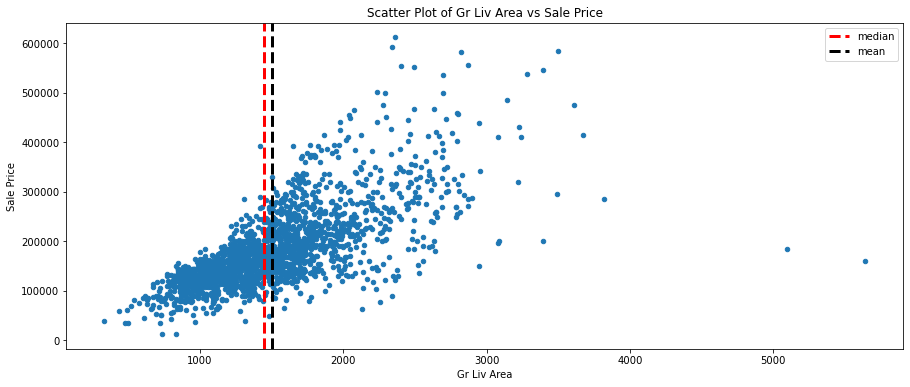

In [29]:
# plot histogram of SalePrice
plt.rcParams['figure.figsize'] = 15,6
hist_saleprice = train_data.plot.scatter(x= 'Gr Liv Area', y= 'SalePrice')

# plot properties
plt.title('Scatter Plot of Gr Liv Area vs Sale Price')
plt.ylabel('Sale Price')
plt.xlabel('Gr Liv Area')
plt.axvline(train_data['Gr Liv Area'].median(), color='r', linestyle='dashed', linewidth=3, label='median')
plt.axvline(train_data['Gr Liv Area'].mean(), color='k', linestyle='dashed', linewidth=3, label = 'mean')
plt.legend()

**Observation :** We can see that there are 2 outliers on the very right side of the graph, therefore we proceed to remove the outliers, since it has very bad representation towards the SalePrice

In [30]:
# drop the row that has Gr Liv Area more than 4000 sqft
train_data = train_data[train_data['Gr Liv Area'] < 4000]

In [31]:
len(train_data)

2048

We are also going to check for outliers based on SalePrice column. 
The criteria for our outlier classification:
- SalePrice more than Q3 + (1.5 * IQR)
- SalePrice less than Q1 - (1.5 * 1QR)

In [32]:
# check the skewness of the features
train_data['SalePrice'].skew()

1.5557874973962118

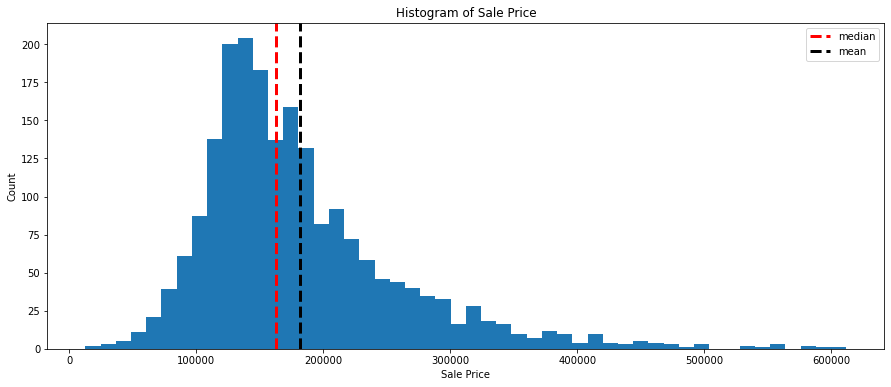

In [33]:
# plot histogram of SalePrice
plt.rcParams['figure.figsize'] = 15,6
hist_saleprice = train_data.hist(column= 'SalePrice', bins= 50, grid= False)

# plot properties
plt.title('Histogram of Sale Price')# feel free to add more settings
plt.xlabel('Sale Price')# Set titles, labels, etc here for each subplot
plt.ylabel('Count')
plt.axvline(train_data['SalePrice'].median(), color='r', linestyle='dashed', linewidth=3, label='median')
plt.axvline(train_data['SalePrice'].mean(), color='k', linestyle='dashed', linewidth=3, label = 'mean')
plt.legend()

In [34]:
# calculate the Q1, Q3 & IQR
q1_sp = train_data['SalePrice'].quantile(0.25)
q3_sp = train_data['SalePrice'].quantile(0.75)
mean_sp = train_data['SalePrice'].mean()
std_sp = train_data['SalePrice'].std()
iqr_sp = q3_sp - q1_sp


In [35]:
# find the criteria value to remove the outliers
o_outliers = q3_sp + (1.5 * iqr_sp)
u_outliers = q1_sp - (1.5 * iqr_sp)

# rows of data that is considered outliers
outliers = train_data[(train_data['SalePrice'] > o_outliers) | (train_data['SalePrice'] < u_outliers)]

In [36]:
# drop the rows that is considered outliers    
train_data = train_data[(train_data['SalePrice'] <= o_outliers) & (train_data['SalePrice'] >= u_outliers)]

# the adjusted data frame shape
print(train_data.shape)

(1954, 78)


Skew (Adjusted) : 0.6695745981343142


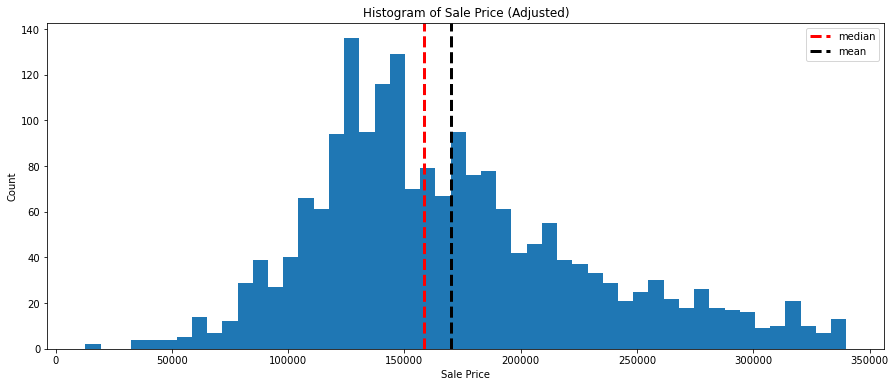

In [37]:
# plot histogram of SalePrice
plt.rcParams['figure.figsize'] = 15,6
hist_saleprice_a = train_data.hist(column= 'SalePrice', bins= 50, grid= False)

# plot properties
plt.title('Histogram of Sale Price (Adjusted)')# feel free to add more settings
plt.xlabel('Sale Price')# Set titles, labels, etc here for each subplot
plt.ylabel('Count')
plt.axvline(train_data['SalePrice'].median(), color='r', linestyle='dashed', linewidth=3, label='median')
plt.axvline(train_data['SalePrice'].mean(), color='k', linestyle='dashed', linewidth=3, label = 'mean')
plt.legend()

# check the skewness after adjustment
print('Skew (Adjusted) :',train_data['SalePrice'].skew())

**_Remark_**: In total, 97 rows are drop as the outlier which accounts for 4.6% of the total rows

In [38]:
# create new dataframe for base data with all columns
base_data = train_data

### 3. EDA

#### 3.1 Nominal Features

In [39]:
# list for the nominal features
nominal_fts = ['MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 
               'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 
               'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 
               'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 
               'Garage Type', 'Misc Feature', 'Sale Type']

In [40]:
# function to plot histogram with subplot
def subplot_histogram(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    threshold = len(dataframe) * 0.8
    nrows = int(np.ceil(len(list_of_columns)/3)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=3, sharex=True, sharey=False, squeeze=True, figsize=(30,8*nrows)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], orientation='horizontal')
        ax[i].set_title(('Histogram of ' + list_of_titles[i]))# feel free to add more settings
        ax[i].set_ylabel(list_of_xlabels[i])# Set titles, labels, etc here for each subplot
        ax[i].set_xlabel('Count')
        ax[i].axvline(x= threshold, color='r', linestyle='dashed', linewidth=3, label='80%')
    
    if (len(list_of_columns)%3) == 1:
        fig.delaxes(ax[-2])
        fig.delaxes(ax[-1])
    elif (len(list_of_columns)%3) == 2:
        fig.delaxes(ax[-1])

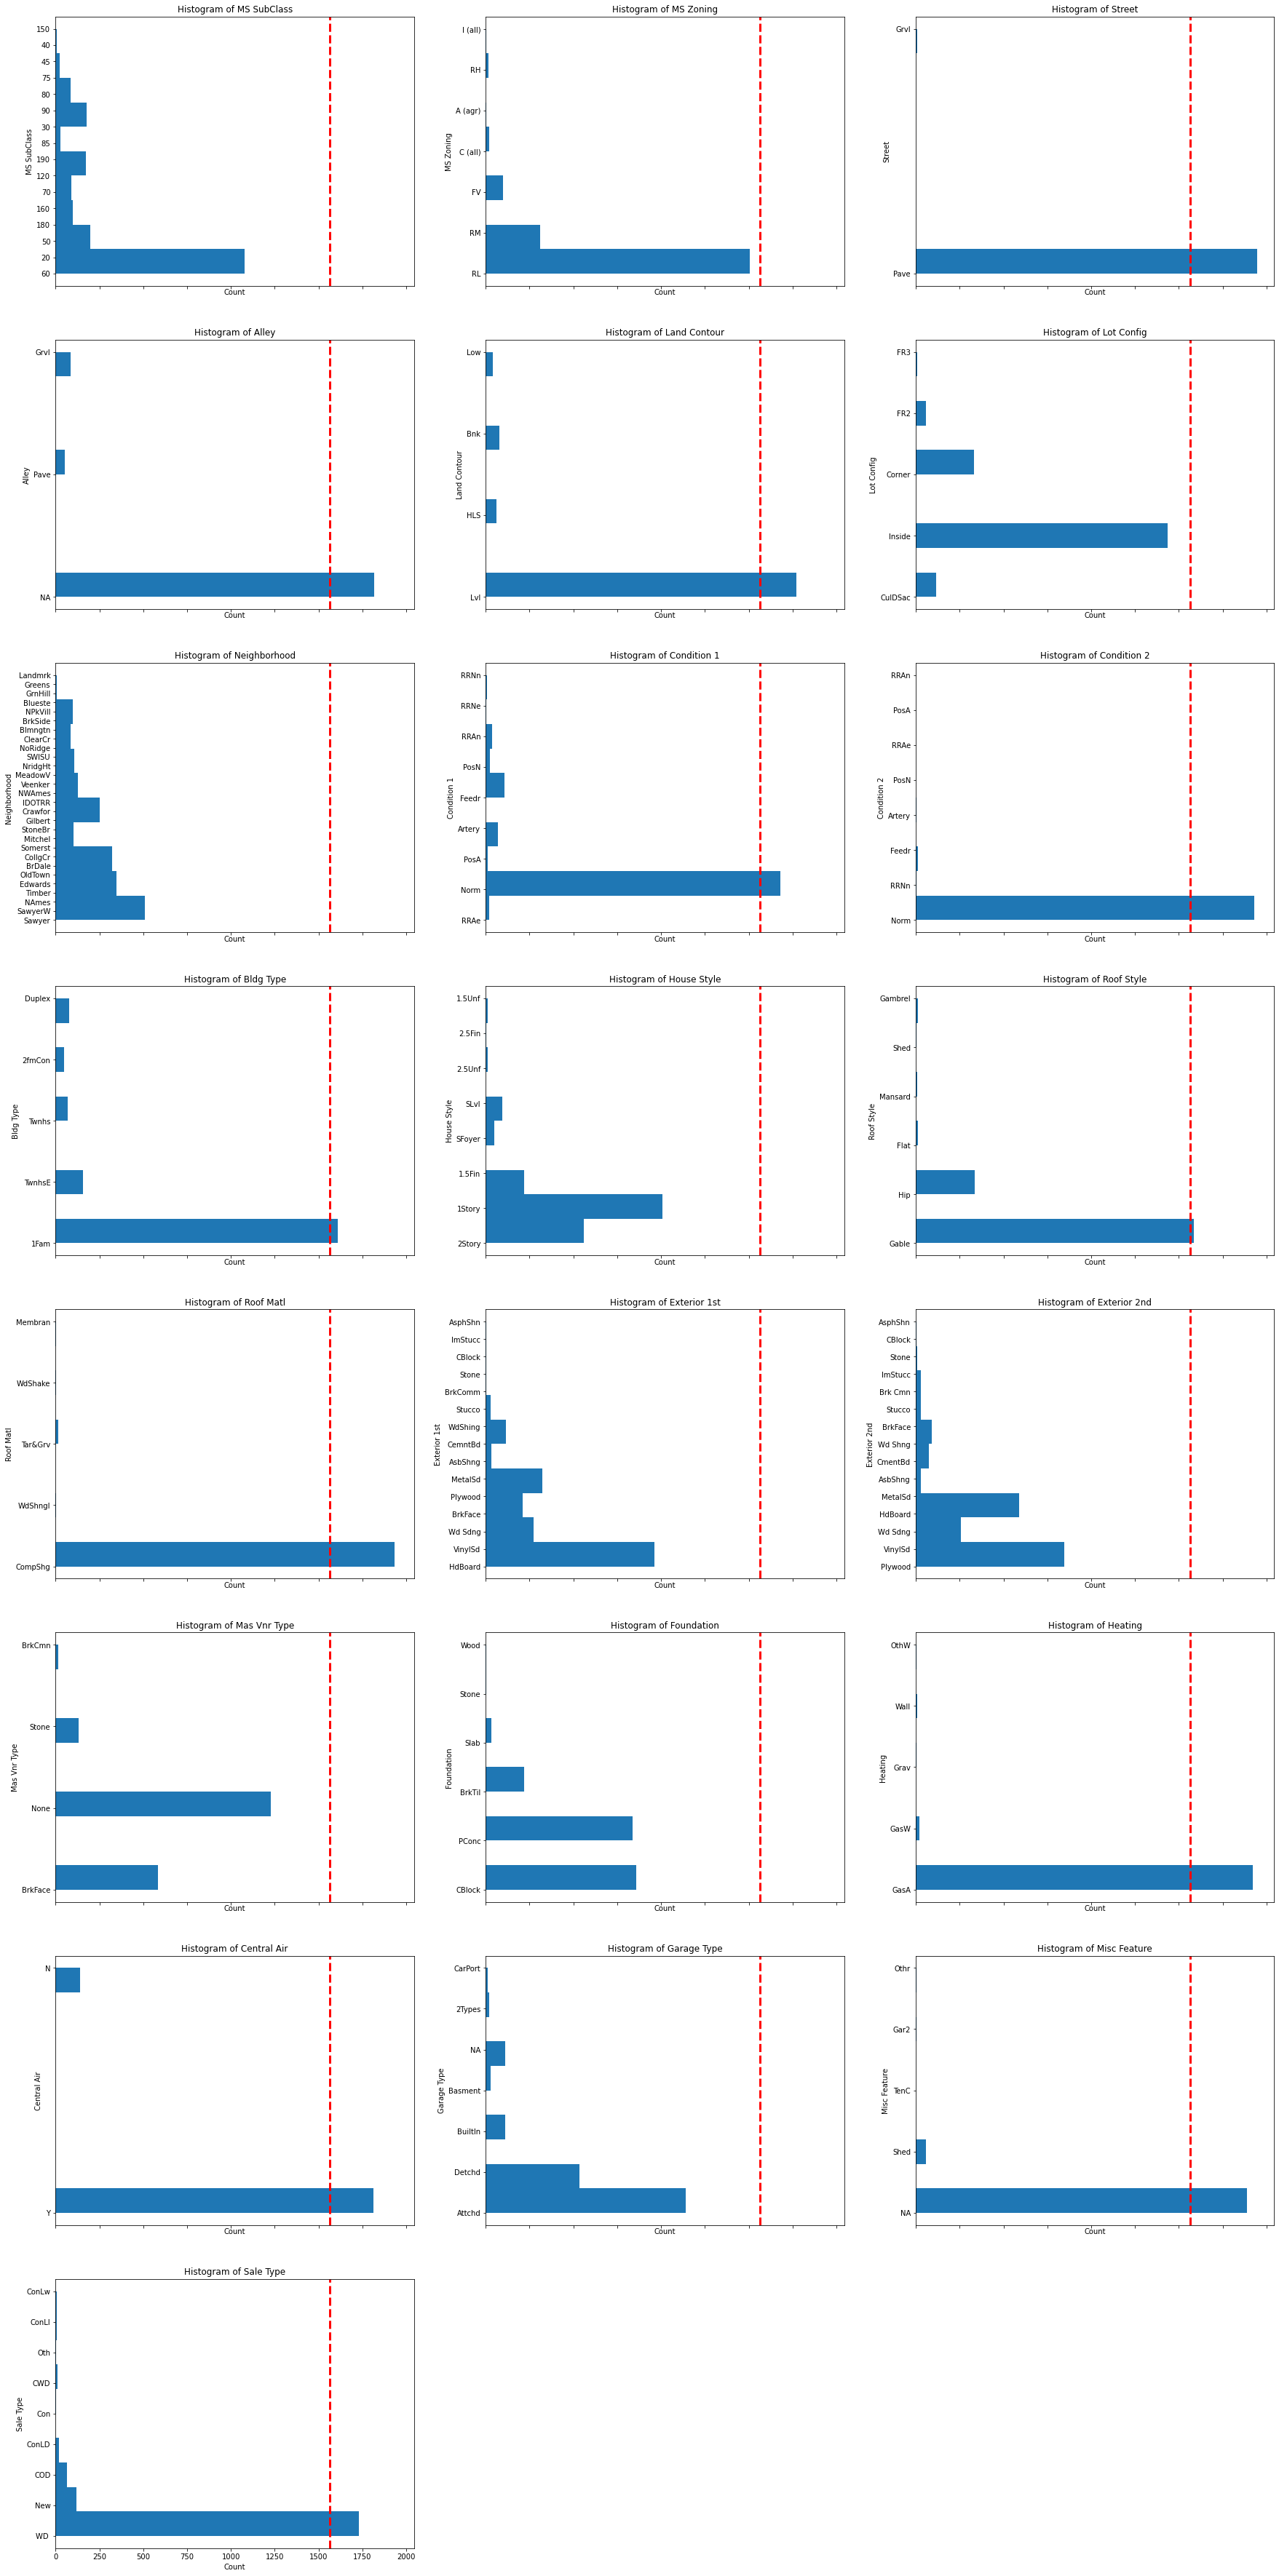

In [41]:
subplot_histogram(train_data, nominal_fts, nominal_fts, nominal_fts)

**Observation :**
From the histogram of the nominal features, the features below will not be significant since more than 80% is the same type thus will not be considered:
- Street
- Alley
- Land Contour
- Condition 1
- Condition 2
- Bldg Type
- Roof Style
- Roof Matl
- Heating
- Central Air
- Misc Feature
- Sale Type  
Total: 12 features

There are features that are overlapped with each other in terms of the definition, thus will not be considered as well:
- MS SubClass, overlapped with Bldg Type & Year Built and difficult to interpret
- MS Zoning, overlapped with Neighborhood  
Total: 2 features

In [42]:
# list of nominal features to be dropped
nominals_to_drop = ['Street', 'Alley', 'Land Contour', 'Condition 1', 'Condition 2', 
                    'Bldg Type', 'Roof Style', 'Roof Matl', 'Heating', 'Central Air', 
                    'Misc Feature', 'Sale Type', 'MS SubClass', 'MS Zoning']

In [43]:
# function to sort the dataframe based on Median for boxplot
def SortByMedian(df, column): 
    
    grouped = df.groupby(column)
    
    df_ = pd.DataFrame({col:vals['SalePrice'] for col,vals in grouped})
    median_ = df_.median()
    median_.sort_values(ascending=True, inplace=True)
    df_ = df_[median_.index]
    return df_

In [44]:
# function to create subplots of boxplot
def subplot_boxplot(df, col, grouped_col):
    fig, ax = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, squeeze=True, figsize=(15,12))
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    df0 = SortByMedian(df, col)
    df0.boxplot(ax= ax[0])
    ax[0].set_title(('Boxplot of ' + col))# feel free to add more settings
    ax[0].set_ylabel('SalePrice')# Set titles, labels, etc here for each subplot
    ax[0].set_xlabel(col)
    
    df1 = SortByMedian(df, grouped_col)
    df1.boxplot(ax= ax[1])
    ax[1].set_title(('Boxplot of ' + grouped_col))# feel free to add more settings
    ax[1].set_ylabel('SalePrice')# Set titles, labels, etc here for each subplot
    ax[1].set_xlabel(grouped_col)

##### 3.1.1 Lot Config

In [45]:
# check the proportion of the value in the column
train_data['Lot Config'].value_counts(normalize=True)

Inside     0.735415
Corner     0.169908
CulDSac    0.059877
FR2        0.030194
FR3        0.004606
Name: Lot Config, dtype: float64

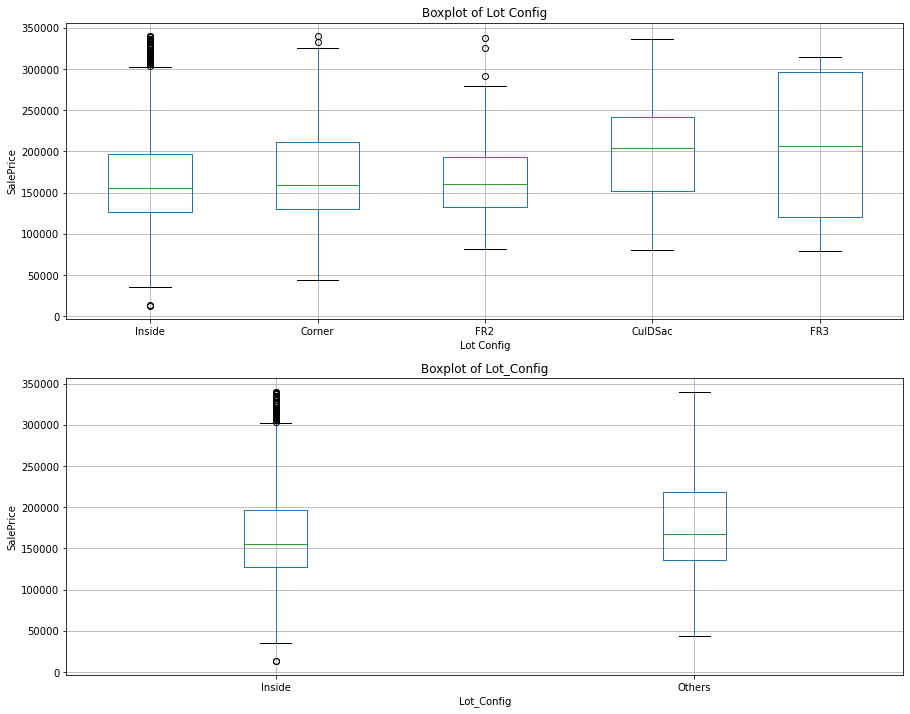

In [46]:
# combine FR2,FR3 and Corner to FR2+ (where property got 2 frontage or more)
train_data['Lot_Config'] = train_data['Lot Config'].apply(lambda lot: 'Others' if lot != 'Inside' else lot)

# boxplot of Lot Config and SalePrice
subplot_boxplot(train_data, 'Lot Config', 'Lot_Config')

**Observation :** There is no significant difference between each features thus we can drop this feature

In [47]:
# drop the Lot_Config column
train_data.drop('Lot_Config', axis=1, inplace=True)

# add Lot Config to the list of features to be dropped
nominals_to_drop.append('Lot Config')

##### 3.1.2 House Style

In [48]:
# check the proportion of the value in the column
train_data['House Style'].value_counts(normalize=True)

1Story    0.514841
2Story    0.285568
1.5Fin    0.111054
SLvl      0.047595
SFoyer    0.025589
2.5Unf    0.006653
1.5Unf    0.006141
2.5Fin    0.002559
Name: House Style, dtype: float64

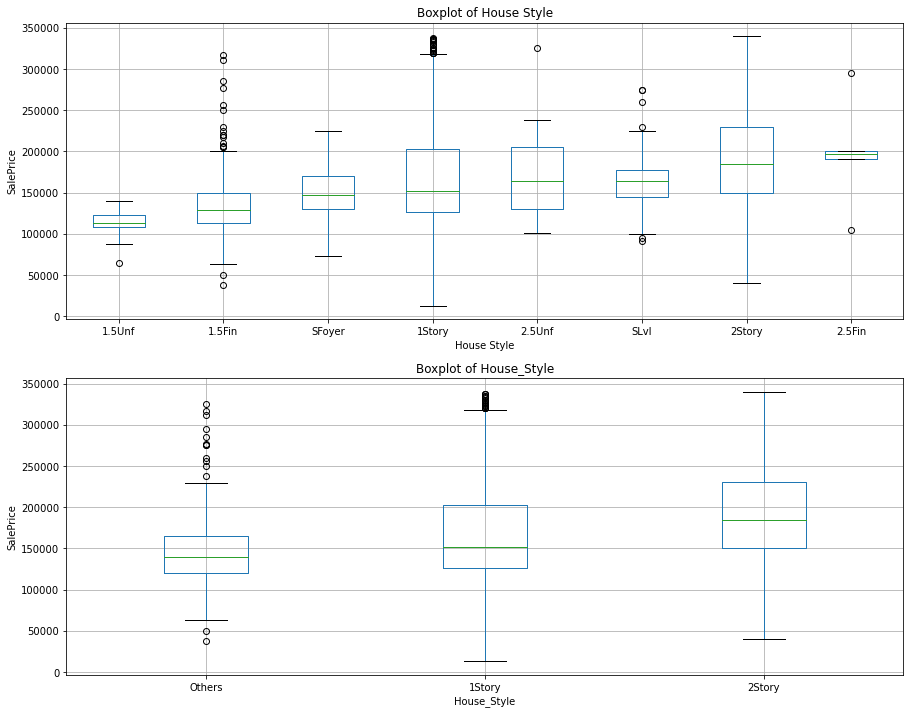

In [49]:
# House Style dictionary into 3 categories: 1 Story, 2 Story and Others
hstyle_dict = {'1.5Unf':'Others', '1.5Fin':'Others', 'SFoyer':'Others', '1Story':'1Story', 
               '2.5Unf':'Others', 'SLvl':'Others', '2Story':'2Story', '2.5Fin':'Others'}

# train_data['House_Style'] = train_data['House Style'].apply(lambda hstyle: 'MultiStory' if hstyle != '1Story' else hstyle)
train_data['House_Style'] = train_data['House Style'].map(hstyle_dict)

# boxplot of House Style & House_Style with SalePrice
subplot_boxplot(train_data, 'House Style', 'House_Style')

**Observation :** There is some difference in the interquartile range between each features although not significant thus we can try to include 'House_Style' feature.  

In [50]:
# list of nominal features to be dummified
nominals_dummy = ['House_Style']

# add House Style to the list of features to be dropped
nominals_to_drop.append('House Style')

##### 3.1.3 Foundation

In [51]:
# check the proportion of the value in the column
train_data['Foundation'].value_counts(normalize=True)

CBlock    0.439611
PConc     0.427840
BrkTil    0.111566
Slab      0.017400
Stone     0.002559
Wood      0.001024
Name: Foundation, dtype: float64

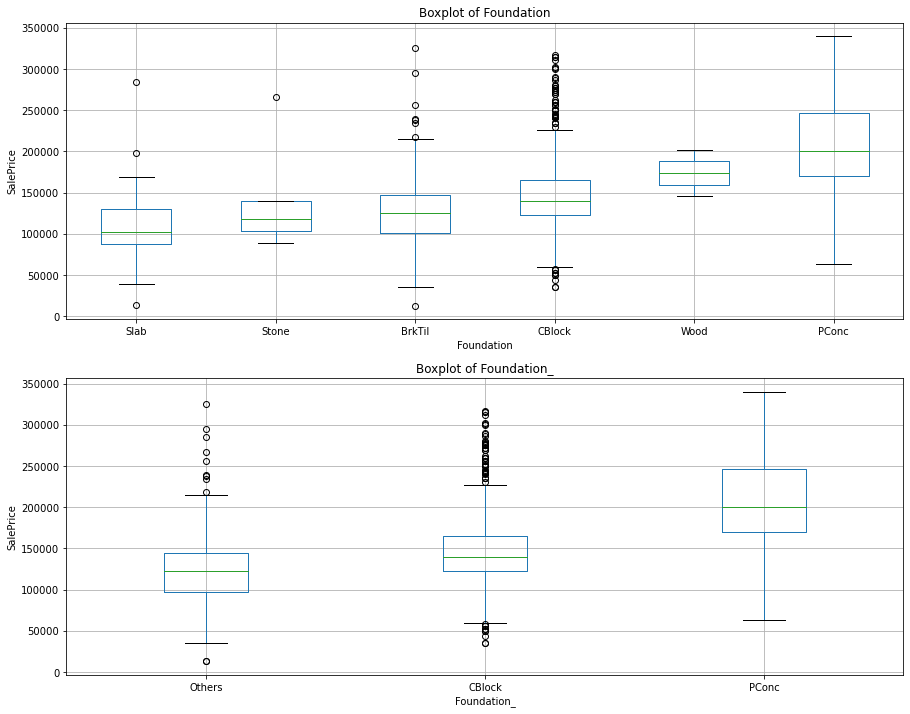

In [52]:
# create Foundation_ column to store 3 categories: CBlock, PConc and Others
train_data['Foundation_'] = train_data['Foundation'].apply(lambda f: f if (f == 'CBlock' or f == 'PConc') else 'Others')

# boxplot of Foundation and Foundation_ with SalePrice
subplot_boxplot(train_data, 'Foundation', 'Foundation_')

**Observation :** There is some difference in the interquartile range between each features although not significant thus we can try to include 'Foundation_' feature.  

In [53]:
# add Foundation_ to nominals_dummy list
nominals_dummy.append('Foundation_')

# add Foundation to the list of features to be dropped
nominals_to_drop.append('Foundation')

##### 3.1.4 Mas Vnr Type

In [54]:
# check the proportion of the value in the column
train_data['Mas Vnr Type'].value_counts(normalize=True)

None       0.627943
BrkFace    0.297851
Stone      0.067554
BrkCmn     0.006653
Name: Mas Vnr Type, dtype: float64

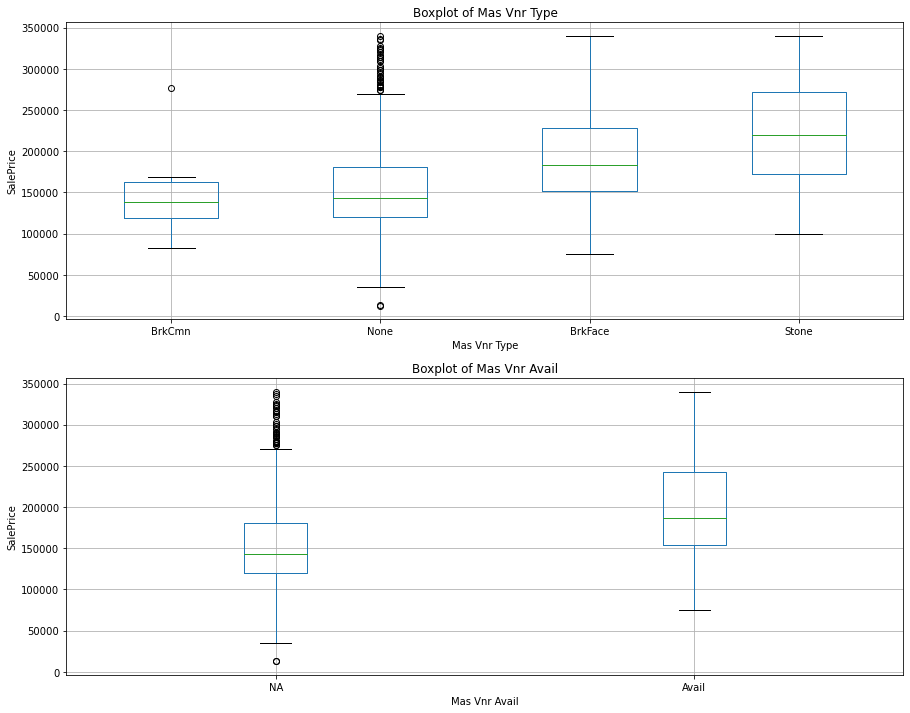

In [55]:
# categorise the Mas Vnr Type into two categories None and Avail
train_data['Mas Vnr Avail'] = train_data['Mas Vnr Type'].apply(lambda mvtype: 'NA' if mvtype == 'None' else 'Avail')

# boxplot of Alley Avail and SalePrice
subplot_boxplot(train_data, 'Mas Vnr Type', 'Mas Vnr Avail')

**Observation :** There is some difference in the interquartile range between each features although not significant thus we can try to include 'Mas Vnr Avail' feature.  

In [56]:
# binarize the Mas Vnr Avail
train_data['Mas Vnr Avail'] = train_data['Mas Vnr Avail'].map({'NA':0, 'Avail':1})

# add Foundation to the list of features to be dropped
nominals_to_drop.append('Mas Vnr Type')

##### 3.1.5 Garage Type

In [57]:
# check the proportion of the value in the column
train_data['Garage Type'].value_counts(normalize=True)

Attchd     0.582907
Detchd     0.272774
NA         0.057830
BuiltIn    0.057318
Basment    0.013818
2Types     0.009724
CarPort    0.005629
Name: Garage Type, dtype: float64

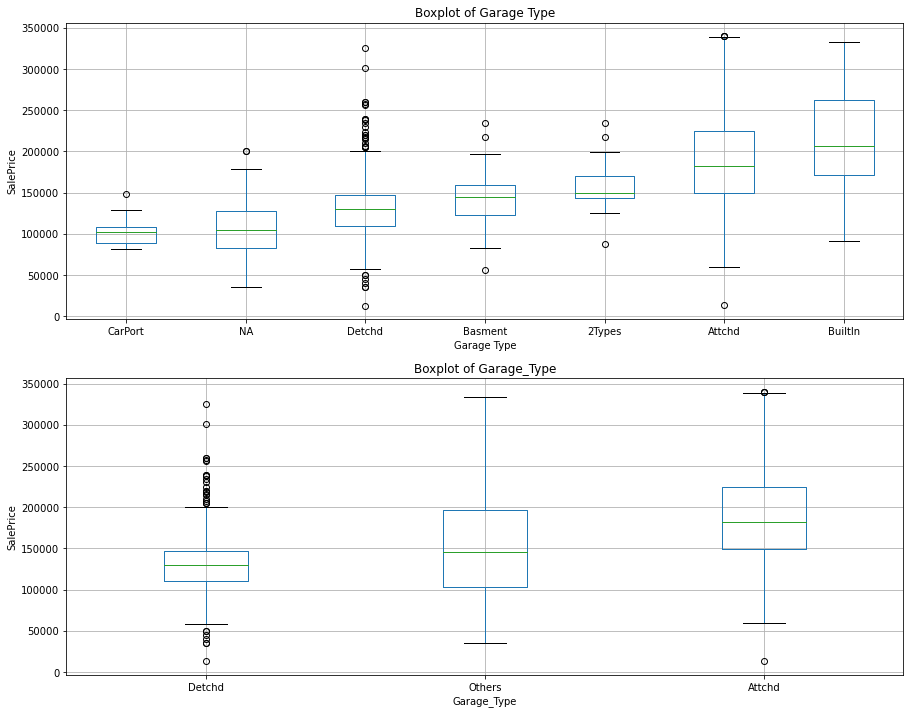

In [58]:
# create Garage_Type column to store 3 categories: Attached, Detached and Others
train_data['Garage_Type'] = train_data['Garage Type'].apply(lambda grg: grg if (grg == 'Attchd' or grg == 'Detchd') else 'Others')

# boxplot of Garage Type, Garage_Type and SalePrice
subplot_boxplot(train_data, 'Garage Type', 'Garage_Type')

**Observation :** There is no significant difference between each features thus we can drop this feature

In [59]:
# drop the Garage_Type column
train_data.drop('Garage_Type', axis=1, inplace=True)

# add Garage Type to the list of features to be dropped
nominals_to_drop.append('Garage Type')

##### 3.1.6 Neighborhood

In [60]:
# check the proportion of the value in the column
train_data['Neighborhood'].value_counts(normalize=True)

NAmes      0.158137
CollgCr    0.090072
OldTown    0.082907
Edwards    0.071648
Somerst    0.064995
Gilbert    0.058854
Sawyer     0.056807
SawyerW    0.044524
NWAmes     0.044524
Mitchel    0.041965
NridgHt    0.038895
BrkSide    0.038895
Crawfor    0.035312
IDOTRR     0.034800
Timber     0.022006
NoRidge    0.018936
SWISU      0.016377
ClearCr    0.013818
MeadowV    0.012282
Blmngtn    0.011259
StoneBr    0.010747
BrDale     0.009724
NPkVill    0.008700
Veenker    0.007677
Blueste    0.003071
Greens     0.001535
GrnHill    0.001024
Landmrk    0.000512
Name: Neighborhood, dtype: float64

![](https://snipboard.io/jn5bLG.jpg)

In [61]:
# dictionary of the neighborhood with its cardinal direction of Iowa State University
nghbrhd_dict = {'NAmes': 'North', 'CollgCr': 'West', 'OldTown': 'East', 'Edwards': 'West', 'Somerst': 'North', 'Gilbert': 'North',
                'Sawyer': 'West', 'SawyerW': 'West', 'NWAmes': 'North', 'Mitchel': 'South', 'NridgHt': 'North', 'BrkSide': 'East',
                'Crawfor': 'South', 'IDOTRR': 'East', 'Timber': 'South', 'NoRidge': 'North', 'SWISU': 'South', 'ClearCr': 'West',
                'MeadowV': 'South', 'Blmgntn': 'North', 'StoneBr': 'North', 'BrDale': 'North', 'NPkVill': 'North', 'Veenker': 'North',
                'Blueste': 'South', 'Greens': 'North', 'GrnHill': 'South', 'Landmrk': 'West'}

In [62]:
# categorise the Neigborhood by the cardinal direction which the center is the IOWA State University
train_data['Area_Side'] = train_data['Neighborhood'].map(nghbrhd_dict)

# check the proportion of the value in the column
train_data['Area_Side'].value_counts(normalize=True)

North    0.427536
West     0.280538
East     0.158385
South    0.133540
Name: Area_Side, dtype: float64

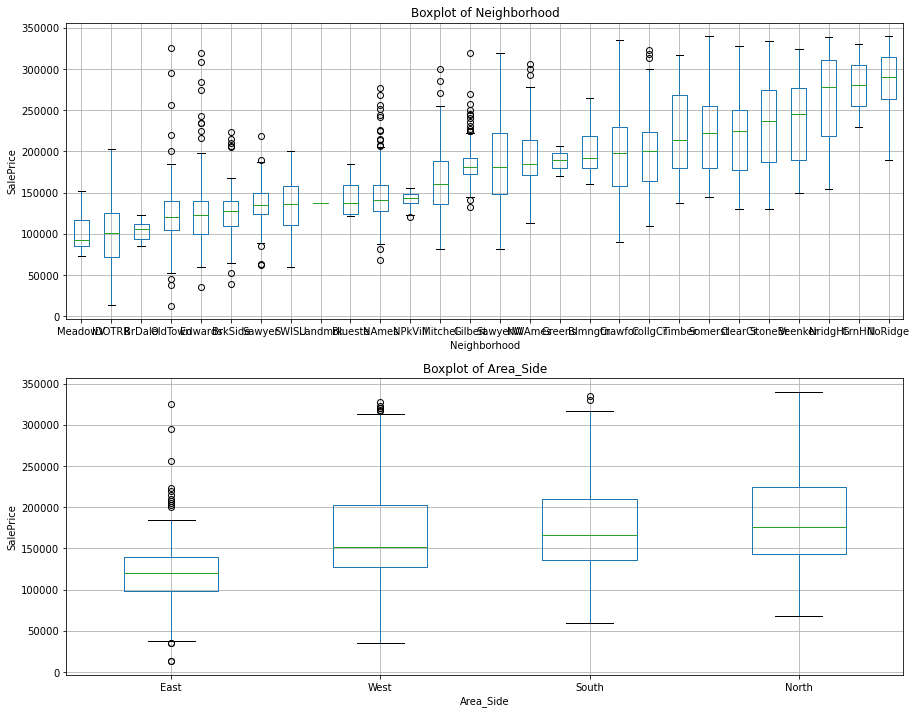

In [63]:
# boxplot of Neighborhood, Area_Side and SalePrice
subplot_boxplot(train_data, 'Neighborhood', 'Area_Side')

**Observation :** There is some difference in the interquartile range between each features although not significant thus we can try to include 'Area_Side' feature, while Neighborhood columns to be dropped 

In [64]:
# add Area_Side to nominals_dummy list
nominals_dummy.append('Area_Side')

# add Neighborhood to the list of features to be dropped
nominals_to_drop.append('Neighborhood')

##### 3.1.7 Exterior 1st and Exterior 2nd

In [65]:
# check the proportion of the value in the column
train_data['Exterior 1st'].value_counts(normalize=True)

VinylSd    0.339816
MetalSd    0.164790
HdBoard    0.153531
Wd Sdng    0.139713
Plywood    0.077277
CemntBd    0.036847
BrkFace    0.030706
WdShing    0.022518
AsbShng    0.016888
Stucco     0.013306
BrkComm    0.001535
Stone      0.001024
CBlock     0.001024
ImStucc    0.000512
AsphShn    0.000512
Name: Exterior 1st, dtype: float64

In [66]:
# check the proportion of the value in the column
train_data['Exterior 2nd'].value_counts(normalize=True)

VinylSd    0.338280
MetalSd    0.160696
HdBoard    0.140737
Wd Sdng    0.132549
Plywood    0.094166
CmentBd    0.037359
Wd Shng    0.031218
BrkFace    0.016377
Stucco     0.014841
AsbShng    0.014330
Brk Cmn    0.008700
ImStucc    0.005118
Stone      0.003071
AsphShn    0.001535
CBlock     0.001024
Name: Exterior 2nd, dtype: float64

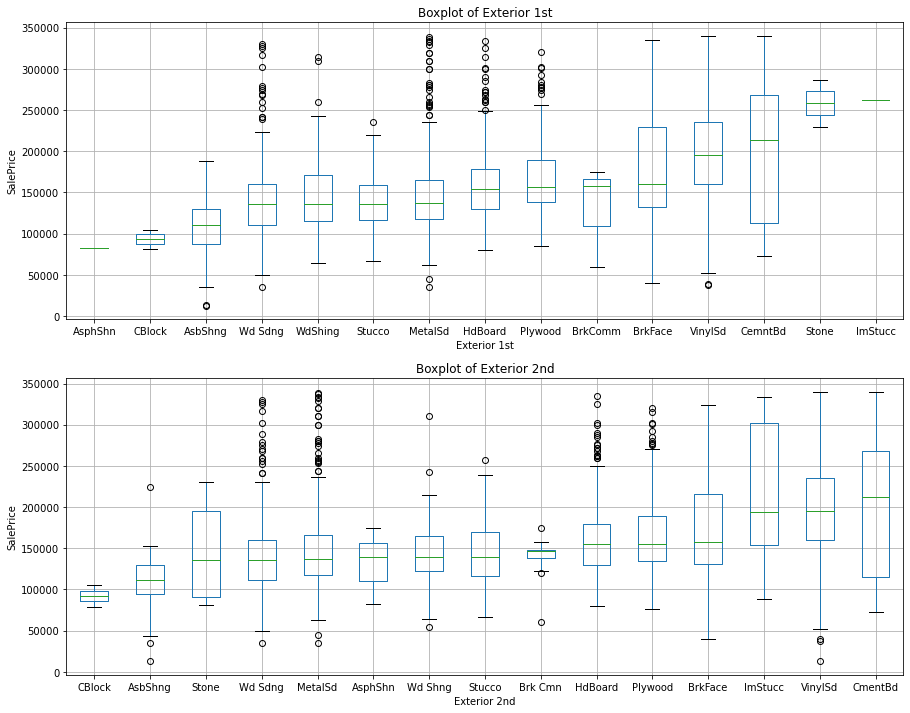

In [67]:
# boxplot of Exterior 1st and Exterior 2nd with SalePrice
subplot_boxplot(train_data, 'Exterior 1st', 'Exterior 2nd')

**Observation :** There is no significant difference between each features thus we can drop this feature

In [68]:
# add Exterior 1st and Exterior 2nd to the list of features to be dropped
nominals_to_drop.extend(['Exterior 1st', 'Exterior 2nd'])

##### 3.1.8 Dummy Features

In [69]:
# list of the features that need to be dummified
nominals_dummy

['House_Style', 'Foundation_', 'Area_Side']

In [70]:
train_data = pd.get_dummies(train_data, prefix= nominals_dummy, columns= nominals_dummy)
train_data.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Mas Vnr Avail,House_Style_1Story,House_Style_2Story,House_Style_Others,Foundation__CBlock,Foundation__Others,Foundation__PConc,Area_Side_East,Area_Side_North,Area_Side_South,Area_Side_West
0,60,RL,74.58,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0,0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500,1,0,1,0,1,0,0,0,0,0,1
1,60,RL,43.00,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1,0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000,1,0,1,0,0,0,1,0,0,0,1
2,20,RL,68.00,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1,0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NA,NA,NA,0,1,2010,WD,109000,0,1,0,0,1,0,0,0,1,0,0
3,60,RL,73.00,9802,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0,0,2,1,3,1,TA,7,Typ,0,NA,BuiltIn,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,174000,0,0,1,0,0,0,1,0,0,1,0
4,50,RL,82.00,14235,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0,0,2,0,3,1,TA,6,Typ,0,NA,Detchd,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NA,NA,NA,0,3,2010,WD,138500,0,0,0,1,0,0,1,0,0,0,1


##### 3.1.9 Exclude Non-Important Nominal Features Columns

In [71]:
print('Total nominal features to be dropped :',len(nominals_to_drop))
nominals_to_drop

Total nominal features to be dropped : 22


['Street',
 'Alley',
 'Land Contour',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'Roof Style',
 'Roof Matl',
 'Heating',
 'Central Air',
 'Misc Feature',
 'Sale Type',
 'MS SubClass',
 'MS Zoning',
 'Lot Config',
 'House Style',
 'Foundation',
 'Mas Vnr Type',
 'Garage Type',
 'Neighborhood',
 'Exterior 1st',
 'Exterior 2nd']

In [72]:
# drop nominal features that will not be considered for modelling from the dataframe
train_data.drop(columns= nominals_to_drop, inplace= True)

In [73]:
train_data.shape

(1954, 67)

#### 3.2 Numerical Features

In [74]:
# list of ordinal features
ordinal_fts = ['Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 
               'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 
               'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 'Electrical', 'Kitchen Qual', 
               'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual', 'Garage Cond', 
               'Paved Drive', 'Pool QC', 'Fence']


In [75]:
# list of continuous features
num_fts = ['Lot Frontage', 'Lot Area', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 
           'BsmtFin SF 1' ,'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
           '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
           'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
           'Fireplaces', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 
           'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 
           'Yr Sold', 'Mo Sold', 'SalePrice']

##### 3.2.1 Mapping the Ordinal Feature

In [76]:
# dictionary of the ordinal features with each attributes
ordinal_dict = {'Lot Shape':['IR3', 'IR2', 'IR1', 'Reg'],
                'Utilities':['ELO','NoSeWa','NoSewr','AllPub'],
                'Land Slope':['Sev','Mod','Gtl'],
                'Overall Qual':[0,1,2,3,4,5,6,7,8,9,10], 
                'Overall Cond':[0,1,2,3,4,5,6,7,8,9,10], 
                'Exter Qual':['Po', 'Fa', 'TA', 'Gd', 'Ex'], 
                'Exter Cond':['Po', 'Fa', 'TA', 'Gd', 'Ex'], 
                'Bsmt Qual':['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], 
                'Bsmt Cond':['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], 
                'Bsmt Exposure':['NA', 'No', 'Mn', 'Av', 'Gd'], 
                'BsmtFin Type 1':['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], 
                'BsmtFin Type 2':['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], 
                'Heating QC':['Po', 'Fa', 'TA', 'Gd', 'Ex'], 
                'Electrical':['Mix','FuseP','FuseF','FuseA','SBrkr'], 
                'Kitchen Qual':['Po', 'Fa', 'TA', 'Gd', 'Ex'], 
                'Functional':['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], 
                'Fireplace Qu':['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], 
                'Garage Finish':['NA','Unf','RFn','Fin'], 
                'Garage Qual':['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], 
                'Garage Cond':['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], 
                'Paved Drive':['N', 'P', 'Y'],
                'Pool QC':['NA','Fa','TA','Gd','Ex'],
                'Fence':['NA','MnWw','GdWo','MnPrv','GdPrv']}

In [77]:
# function for mapping the column values with a numeric scale
def MaptoScale(value, vlist):
    return vlist.index(value)

# iterate through all the ordinal columns list to apply the function and change data type to float
for column in ordinal_fts:
    train_data[column] = train_data[column].apply(MaptoScale, vlist = ordinal_dict[column]).astype('float')


In [78]:
# to check if all value is converted sucessfully
train_data[ordinal_fts].head(10)

,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating QC,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence
0,2.0,3.0,2.0,6.0,8.0,3.0,2.0,3.0,3.0,1.0,6.0,1.0,4.0,4.0,3.0,7.0,0.0,2.0,3.0,3.0,2.0,0.0,0.0
1,2.0,3.0,2.0,7.0,5.0,3.0,2.0,4.0,3.0,1.0,6.0,1.0,4.0,4.0,3.0,7.0,3.0,2.0,3.0,3.0,2.0,0.0,0.0
2,3.0,3.0,2.0,5.0,7.0,2.0,3.0,3.0,3.0,1.0,6.0,1.0,2.0,4.0,3.0,7.0,0.0,1.0,3.0,3.0,2.0,0.0,0.0
3,3.0,3.0,2.0,5.0,5.0,2.0,2.0,4.0,3.0,1.0,1.0,1.0,3.0,4.0,2.0,7.0,0.0,3.0,3.0,3.0,2.0,0.0,0.0
4,2.0,3.0,2.0,6.0,8.0,2.0,2.0,2.0,4.0,1.0,1.0,1.0,2.0,4.0,2.0,7.0,0.0,1.0,3.0,3.0,0.0,0.0,0.0
5,2.0,3.0,2.0,6.0,6.0,3.0,2.0,3.0,3.0,1.0,5.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,3.0,3.0,2.0,0.0,0.0
6,3.0,3.0,2.0,6.0,5.0,2.0,2.0,4.0,3.0,4.0,6.0,1.0,3.0,4.0,2.0,7.0,0.0,3.0,3.0,3.0,2.0,0.0,0.0
7,2.0,3.0,2.0,5.0,5.0,2.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,4.0,2.0,7.0,0.0,2.0,3.0,3.0,2.0,0.0,3.0
8,3.0,3.0,2.0,5.0,5.0,2.0,2.0,3.0,3.0,1.0,3.0,1.0,2.0,4.0,2.0,7.0,0.0,1.0,3.0,3.0,2.0,0.0,3.0
9,2.0,3.0,0.0,5.0,5.0,2.0,2.0,4.0,3.0,3.0,3.0,1.0,2.0,4.0,1.0,7.0,3.0,1.0,3.0,3.0,2.0,0.0,0.0


In [79]:
train_data[ordinal_fts].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1954 entries, 0 to 2050
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Shape       1954 non-null   float64
 1   Utilities       1954 non-null   float64
 2   Land Slope      1954 non-null   float64
 3   Overall Qual    1954 non-null   float64
 4   Overall Cond    1954 non-null   float64
 5   Exter Qual      1954 non-null   float64
 6   Exter Cond      1954 non-null   float64
 7   Bsmt Qual       1954 non-null   float64
 8   Bsmt Cond       1954 non-null   float64
 9   Bsmt Exposure   1954 non-null   float64
 10  BsmtFin Type 1  1954 non-null   float64
 11  BsmtFin Type 2  1954 non-null   float64
 12  Heating QC      1954 non-null   float64
 13  Electrical      1954 non-null   float64
 14  Kitchen Qual    1954 non-null   float64
 15  Functional      1954 non-null   float64
 16  Fireplace Qu    1954 non-null   float64
 17  Garage Finish   1954 non-null   f

##### 3.2.2 Heatmap of Correlation Between Features

In [80]:
# combine ordinal and continuous features to a list
fts = ordinal_fts + num_fts
fts

['Lot Shape',
 'Utilities',
 'Land Slope',
 'Overall Qual',
 'Overall Cond',
 'Exter Qual',
 'Exter Cond',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating QC',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Pool QC',
 'Fence',
 'Lot Frontage',
 'Lot Area',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Yr Sold',
 'Mo Sold',
 'SalePrice']

In [81]:
# create new dataframe with fts list column name
train_fts = train_data[fts]

train_fts.head()

,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating QC,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,Mo Sold,SalePrice
0,2.0,3.0,2.0,6.0,8.0,3.0,2.0,3.0,3.0,1.0,6.0,1.0,4.0,4.0,3.0,7.0,0.0,2.0,3.0,3.0,2.0,0.0,0.0,74.58,13517,1976,2005,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,0,0,2,1,3,1,6,0,2.0,475.0,0,44,0,0,0,0,0,2010,3,130500
1,2.0,3.0,2.0,7.0,5.0,3.0,2.0,4.0,3.0,1.0,6.0,1.0,4.0,4.0,3.0,7.0,3.0,2.0,3.0,3.0,2.0,0.0,0.0,43.00,11492,1996,1997,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,1,0,2,1,4,1,8,1,2.0,559.0,0,74,0,0,0,0,0,2009,4,220000
2,3.0,3.0,2.0,5.0,7.0,2.0,3.0,3.0,3.0,1.0,6.0,1.0,2.0,4.0,3.0,7.0,0.0,1.0,3.0,3.0,2.0,0.0,0.0,68.00,7922,1953,2007,0.0,731.0,0.0,326.0,1057.0,1057,0,0,1057,1,0,1,0,3,1,5,0,1.0,246.0,0,52,0,0,0,0,0,2010,1,109000
3,3.0,3.0,2.0,5.0,5.0,2.0,2.0,4.0,3.0,1.0,1.0,1.0,3.0,4.0,2.0,7.0,0.0,3.0,3.0,3.0,2.0,0.0,0.0,73.00,9802,2006,2007,0.0,0.0,0.0,384.0,384.0,744,700,0,1444,0,0,2,1,3,1,7,0,2.0,400.0,100,0,0,0,0,0,0,2010,4,174000
4,2.0,3.0,2.0,6.0,8.0,2.0,2.0,2.0,4.0,1.0,1.0,1.0,2.0,4.0,2.0,7.0,0.0,1.0,3.0,3.0,0.0,0.0,0.0,82.00,14235,1900,1993,0.0,0.0,0.0,676.0,676.0,831,614,0,1445,0,0,2,0,3,1,6,0,2.0,484.0,0,59,0,0,0,0,0,2010,3,138500


In [82]:
# correlation for every pair of the features
corr = train_fts.corr()

In [83]:
# list of the correlation with SalePrice and other features that has p-value higher than 0.5
corr_list = corr['SalePrice'].iloc[:-1].sort_values(ascending= False)
corr_list = corr_list[corr_list > 0.5]
corr_list

Overall Qual      0.789617
Gr Liv Area       0.677887
Exter Qual        0.669849
Kitchen Qual      0.647822
Garage Cars       0.626066
Garage Area       0.615088
Year Built        0.600998
Total Bsmt SF     0.589474
Bsmt Qual         0.588699
Year Remod/Add    0.573572
1st Flr SF        0.566783
Garage Finish     0.566342
Full Bath         0.556303
Fireplace Qu      0.514254
Name: SalePrice, dtype: float64

In [84]:
corr_list = corr_list.index.tolist()
corr_list.append('SalePrice')
corr_list

['Overall Qual',
 'Gr Liv Area',
 'Exter Qual',
 'Kitchen Qual',
 'Garage Cars',
 'Garage Area',
 'Year Built',
 'Total Bsmt SF',
 'Bsmt Qual',
 'Year Remod/Add',
 '1st Flr SF',
 'Garage Finish',
 'Full Bath',
 'Fireplace Qu',
 'SalePrice']

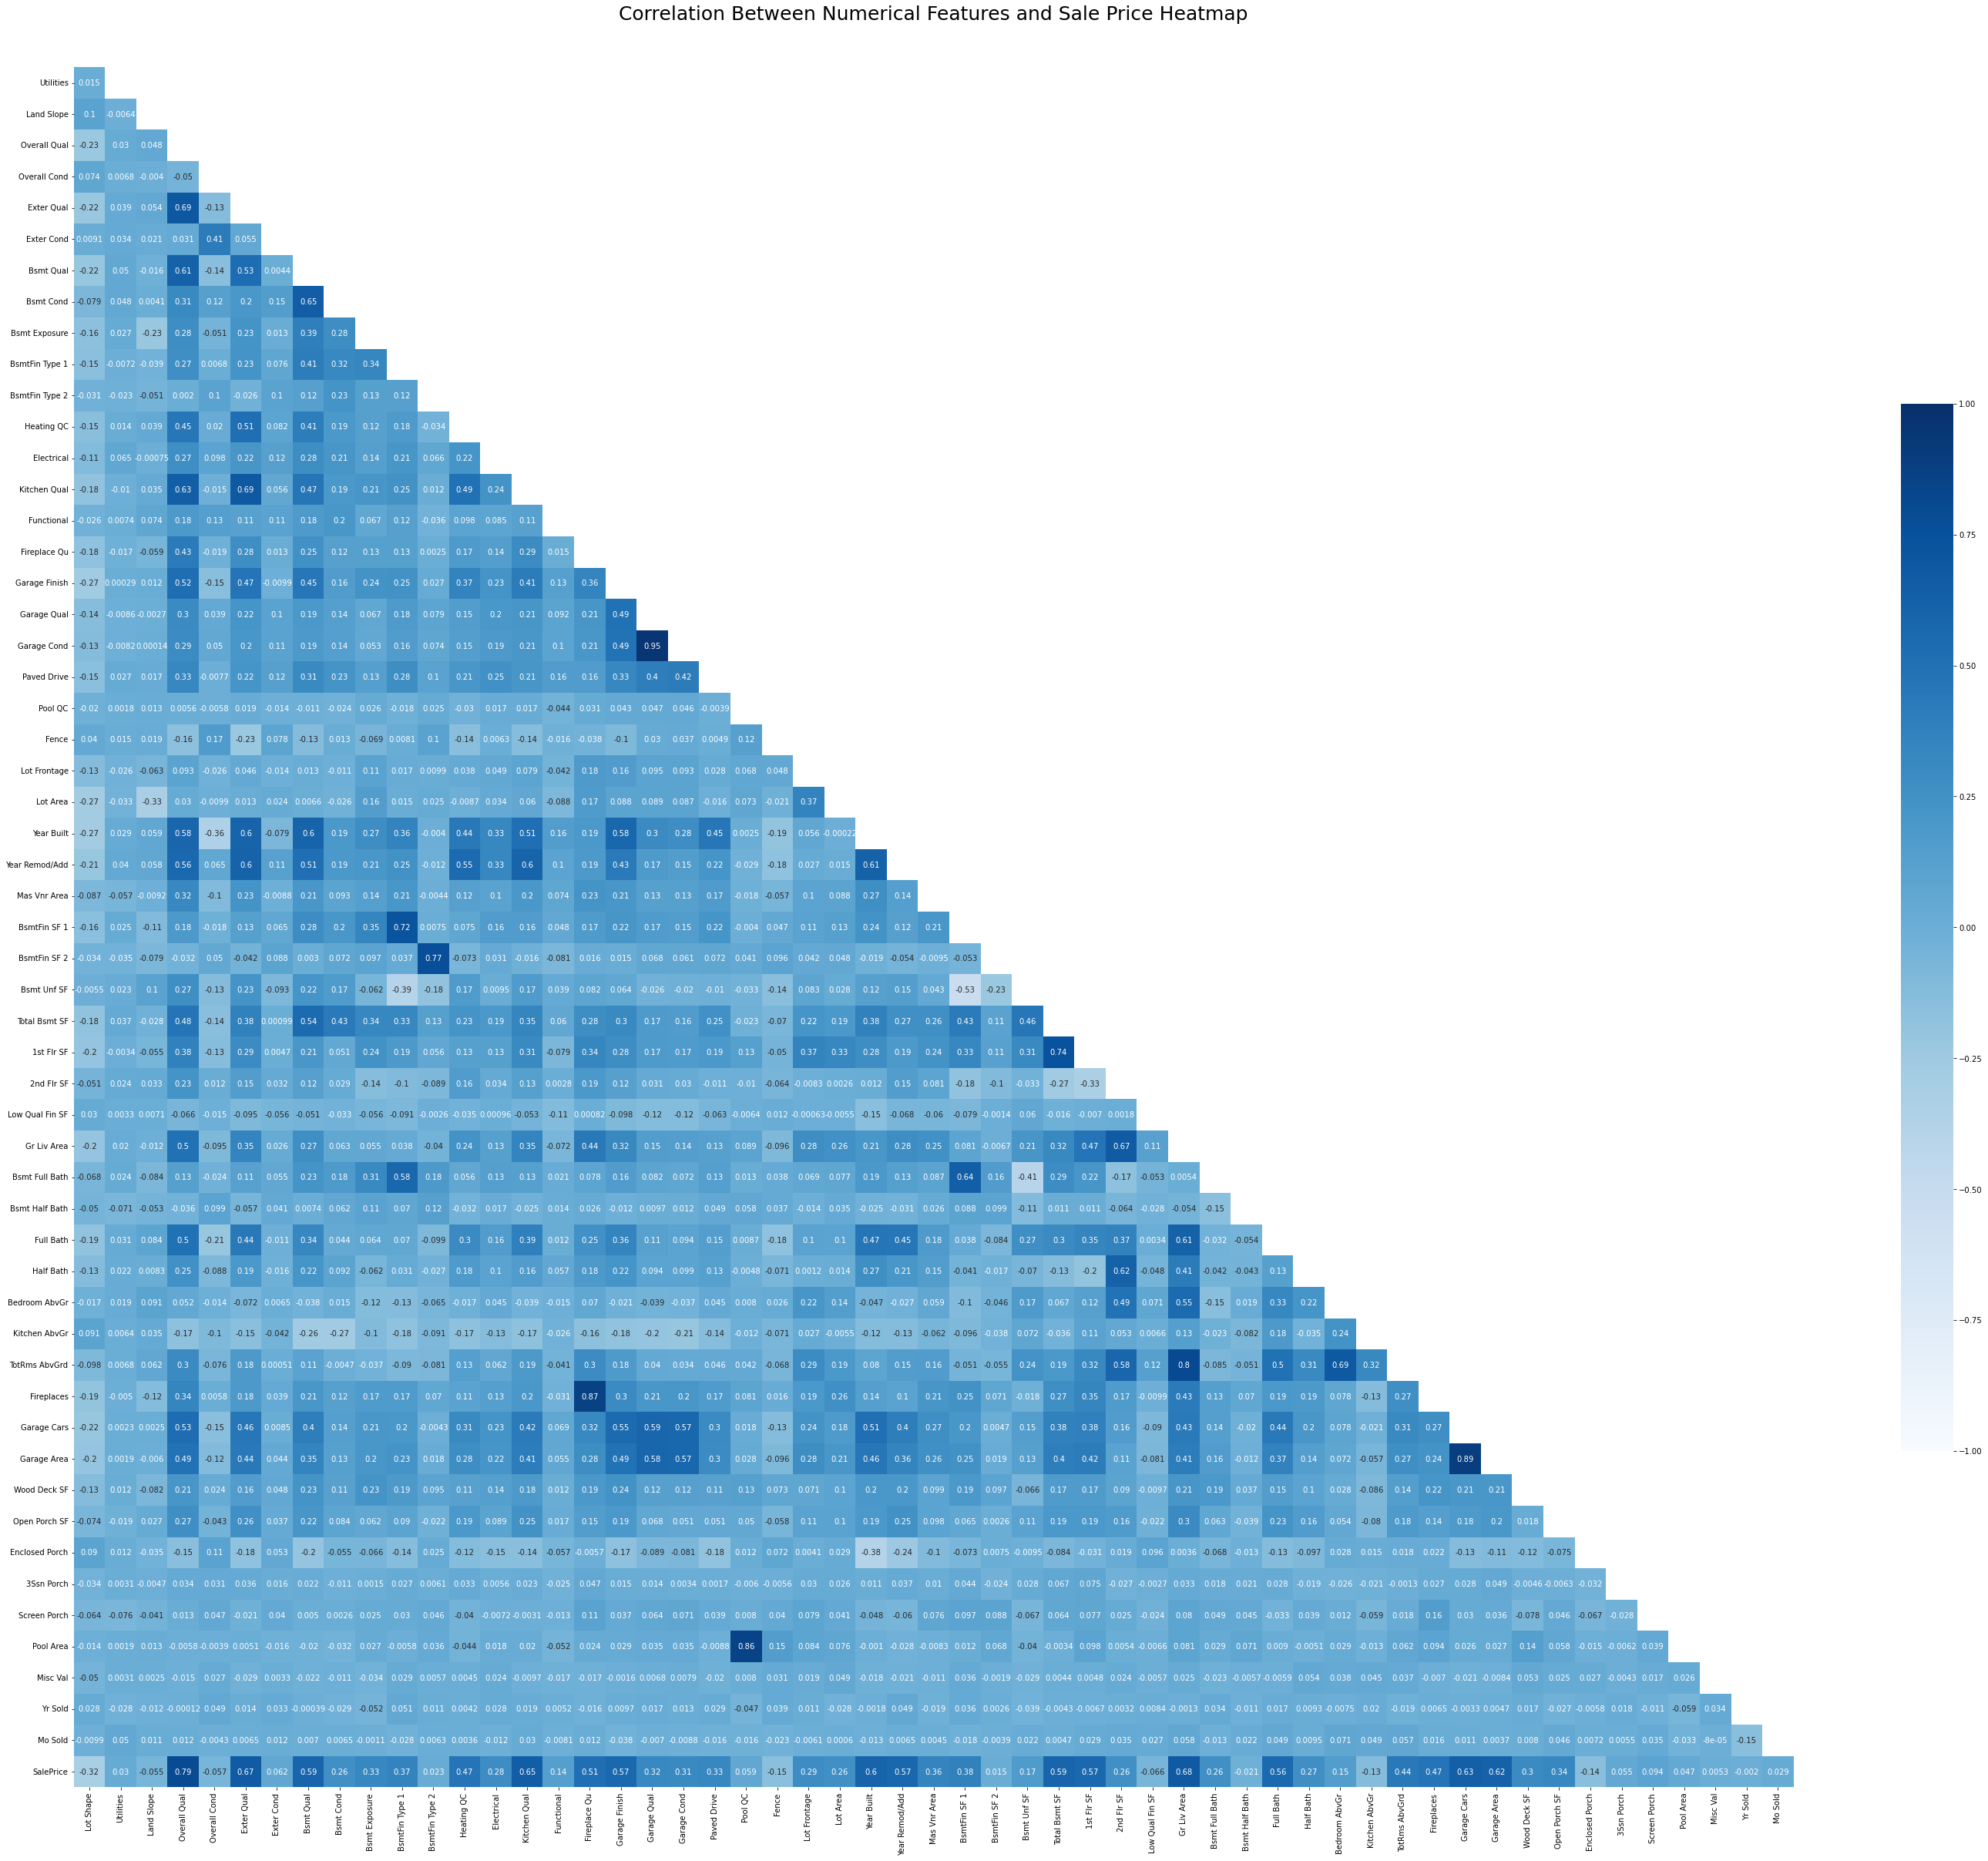

In [85]:
# create heatmap for all the pair in train_ordinals dataframe
plt.rcParams['figure.figsize'] = 50,50

upper_tri = np.triu(train_fts.corr()) #to return the upper triangle of a matrix

mask = upper_tri[1:, :-1]
corr = train_fts.corr().iloc[1:,:-1].copy()

sns.heatmap(corr, annot= True, square= True,
           vmin= -1, vmax= 1, center= 0, cmap= 'Blues', mask= mask,
           cbar_kws={"shrink": .5})

# title
title = 'Correlation Between Numerical Features and Sale Price Heatmap\n\n'
plt.title(title, size= 25)

plt.savefig("fts_heatmap.png",
            bbox_inches ="tight",
            pad_inches = 1,
            orientation ='landscape')

**Observation :** Below are the feature pairs that has high collinerity:  
- Fireplaces and Fireplace Qu (p = 0.87), we will try to combine Fireplaces x Fireplace Qu
- Overall Qual and Exter Qual (p = 0.69), we will try to combine Overall Qual x Exter Qual
- Total Bsmt SF and 1st Flr SF (p = 0.74), we will create new features
- TotRmsAbvGrd and Gr Liv Area (p = 0.8), we will try to combine Gr Liv Area/TotRmsAbvGrd
- Garage Cars and Garage Area (p = 0.89), we will try to combine Garage Area/Garage Cars

Here are some feature pairs that has high collinearity with each other but have quite low correlation with SalePrice, thus will be excluded:
- BsmtFin SF 1 and BsmtFin Type 1
- BsmtFin SF 2 and BsmtFin Type 2
- Pool Area and Pool QC 
- Garage Cond and Garage Qual
  
Below are the features that will be dropped as well due to low correlation with SalePrice (p < 0.5):

In [86]:
corr = train_fts.corr()
corr_list = corr['SalePrice'].iloc[:-1].sort_values(ascending= False)
corr_list = corr_list[corr_list.abs() < 0.5]
corr_list

Fireplaces         0.473094
Heating QC         0.472419
TotRms AbvGrd      0.440369
BsmtFin SF 1       0.376382
BsmtFin Type 1     0.365395
Mas Vnr Area       0.356024
Open Porch SF      0.335056
Paved Drive        0.334657
Bsmt Exposure      0.332656
Garage Qual        0.320925
Garage Cond        0.309263
Wood Deck SF       0.297768
Lot Frontage       0.287874
Electrical         0.281658
Half Bath          0.271263
2nd Flr SF         0.264034
Lot Area           0.260316
Bsmt Cond          0.259874
Bsmt Full Bath     0.259273
Bsmt Unf SF        0.170346
Bedroom AbvGr      0.153449
Functional         0.140248
Screen Porch       0.093817
Exter Cond         0.061791
Pool QC            0.059421
3Ssn Porch         0.054637
Pool Area          0.046593
Utilities          0.030083
Mo Sold            0.029457
BsmtFin Type 2     0.023034
BsmtFin SF 2       0.015158
Misc Val           0.005338
Yr Sold           -0.002012
Bsmt Half Bath    -0.020608
Land Slope        -0.055195
Overall Cond      -0

In [87]:
fts_drop = corr_list.index.tolist()
fts_drop

['Fireplaces',
 'Heating QC',
 'TotRms AbvGrd',
 'BsmtFin SF 1',
 'BsmtFin Type 1',
 'Mas Vnr Area',
 'Open Porch SF',
 'Paved Drive',
 'Bsmt Exposure',
 'Garage Qual',
 'Garage Cond',
 'Wood Deck SF',
 'Lot Frontage',
 'Electrical',
 'Half Bath',
 '2nd Flr SF',
 'Lot Area',
 'Bsmt Cond',
 'Bsmt Full Bath',
 'Bsmt Unf SF',
 'Bedroom AbvGr',
 'Functional',
 'Screen Porch',
 'Exter Cond',
 'Pool QC',
 '3Ssn Porch',
 'Pool Area',
 'Utilities',
 'Mo Sold',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Misc Val',
 'Yr Sold',
 'Bsmt Half Bath',
 'Land Slope',
 'Overall Cond',
 'Low Qual Fin SF',
 'Kitchen AbvGr',
 'Enclosed Porch',
 'Fence',
 'Lot Shape']

##### 3.2.3 Feature Engineering

We would also liked to introduce some new feature: 
- Total Bath
- Bedroom to Bathroom Ratio 
- Age of the property as of the year sold
- Age of the property as of last renovation 
- Total Bsmt SF x Basement Qual
- Fireplaces x Fireplace Qu
- Overall Qual x Exter Qual
- Gr Liv Area/TotRmsAbvGrd
- Garage Area/Garage Cars
- Ext_Facilities_Area

In [88]:
# create new feature of Total_Bath
train_fts = train_fts.assign(Total_Bath= lambda x: x['Bsmt Full Bath'] + (0.5*x['Bsmt Half Bath']) + x['Full Bath'] + (0.5*x['Half Bath']))

# create new feature of BR_Bath_Ratio
train_fts = train_fts.assign(BR_Bath_Ratio= lambda x: (x['Bedroom AbvGr'] / x['Total_Bath']).round(2))

# create new feature of Age
train_fts = train_fts.assign(Age= lambda x: x['Yr Sold'] - x['Year Built'])

# create new feature of Age_Renov
train_fts = train_fts.assign(Age_Renov= lambda x: x['Yr Sold'] - x['Year Remod/Add'])

# create new feature of Bsmt_QC
train_fts = train_fts.assign(Bsmt_QC= lambda x: x['Total Bsmt SF'] * x['Bsmt Cond'])

# create new feature of Fireplace_QC
train_fts = train_fts.assign(Fireplace_QC= lambda x: x['Fireplaces'] * x['Fireplace Qu'])

# create new feature of Ovrll_Exter_Qual
train_fts = train_fts.assign(Ovrll_Exter_Qual= lambda x: x['Overall Qual'] * x['Exter Qual'])

# create new feature of Area_Rm_Ratio
train_fts = train_fts.assign(Area_Rm_Ratio= lambda x: (x['Gr Liv Area'] / x['TotRms AbvGrd']).round(2))

# create new feature of Garage_Ratio
train_fts = train_fts.assign(Garage_Ratio= lambda x: (x['Garage Area'] / x['Garage Cars']).round(2))

# create new feature of Ext_Facilities_Area
train_fts = train_fts.assign(Ext_Facilities_Area= lambda x: x['Wood Deck SF'] + x['Open Porch SF'] + x['Enclosed Porch'] + x['3Ssn Porch'] + x['Screen Porch'])

In [89]:
train_fts.drop(columns= fts_drop, inplace= True)

In [90]:
train_fts.head()

,Overall Qual,Exter Qual,Bsmt Qual,Kitchen Qual,Fireplace Qu,Garage Finish,Year Built,Year Remod/Add,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,Garage Cars,Garage Area,SalePrice,Total_Bath,BR_Bath_Ratio,Age,Age_Renov,Bsmt_QC,Fireplace_QC,Ovrll_Exter_Qual,Area_Rm_Ratio,Garage_Ratio,Ext_Facilities_Area
0,6.0,3.0,3.0,3.0,0.0,2.0,1976,2005,725.0,725,1479,2,2.0,475.0,130500,2.5,1.20,34,5,2175.0,0.0,18.0,246.50,237.5,44
1,7.0,3.0,4.0,3.0,3.0,2.0,1996,1997,913.0,913,2122,2,2.0,559.0,220000,3.5,1.14,13,12,2739.0,3.0,21.0,265.25,279.5,74
2,5.0,2.0,3.0,3.0,0.0,1.0,1953,2007,1057.0,1057,1057,1,1.0,246.0,109000,2.0,1.50,57,3,3171.0,0.0,10.0,211.40,246.0,52
3,5.0,2.0,4.0,2.0,0.0,3.0,2006,2007,384.0,744,1444,2,2.0,400.0,174000,2.5,1.20,4,3,1152.0,0.0,10.0,206.29,200.0,100
4,6.0,2.0,2.0,2.0,0.0,1.0,1900,1993,676.0,831,1445,2,2.0,484.0,138500,2.0,1.50,110,17,2704.0,0.0,12.0,240.83,242.0,59


In [91]:
# function to shift SalePrice column to last index
def SalePricetoLast(df, sale_price= train_data['SalePrice']):
    df.drop(columns = ['SalePrice'], inplace= True)
    df.insert((len(df.columns)), 'SalePrice', sale_price)
    return df

SalePricetoLast(train_fts).head()

,Overall Qual,Exter Qual,Bsmt Qual,Kitchen Qual,Fireplace Qu,Garage Finish,Year Built,Year Remod/Add,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,Garage Cars,Garage Area,Total_Bath,BR_Bath_Ratio,Age,Age_Renov,Bsmt_QC,Fireplace_QC,Ovrll_Exter_Qual,Area_Rm_Ratio,Garage_Ratio,Ext_Facilities_Area,SalePrice
0,6.0,3.0,3.0,3.0,0.0,2.0,1976,2005,725.0,725,1479,2,2.0,475.0,2.5,1.20,34,5,2175.0,0.0,18.0,246.50,237.5,44,130500
1,7.0,3.0,4.0,3.0,3.0,2.0,1996,1997,913.0,913,2122,2,2.0,559.0,3.5,1.14,13,12,2739.0,3.0,21.0,265.25,279.5,74,220000
2,5.0,2.0,3.0,3.0,0.0,1.0,1953,2007,1057.0,1057,1057,1,1.0,246.0,2.0,1.50,57,3,3171.0,0.0,10.0,211.40,246.0,52,109000
3,5.0,2.0,4.0,2.0,0.0,3.0,2006,2007,384.0,744,1444,2,2.0,400.0,2.5,1.20,4,3,1152.0,0.0,10.0,206.29,200.0,100,174000
4,6.0,2.0,2.0,2.0,0.0,1.0,1900,1993,676.0,831,1445,2,2.0,484.0,2.0,1.50,110,17,2704.0,0.0,12.0,240.83,242.0,59,138500


Text(0.5, 1.0, 'Correlation Between Numerical Features (including New Features) and Sale Price Heatmap\n\n')

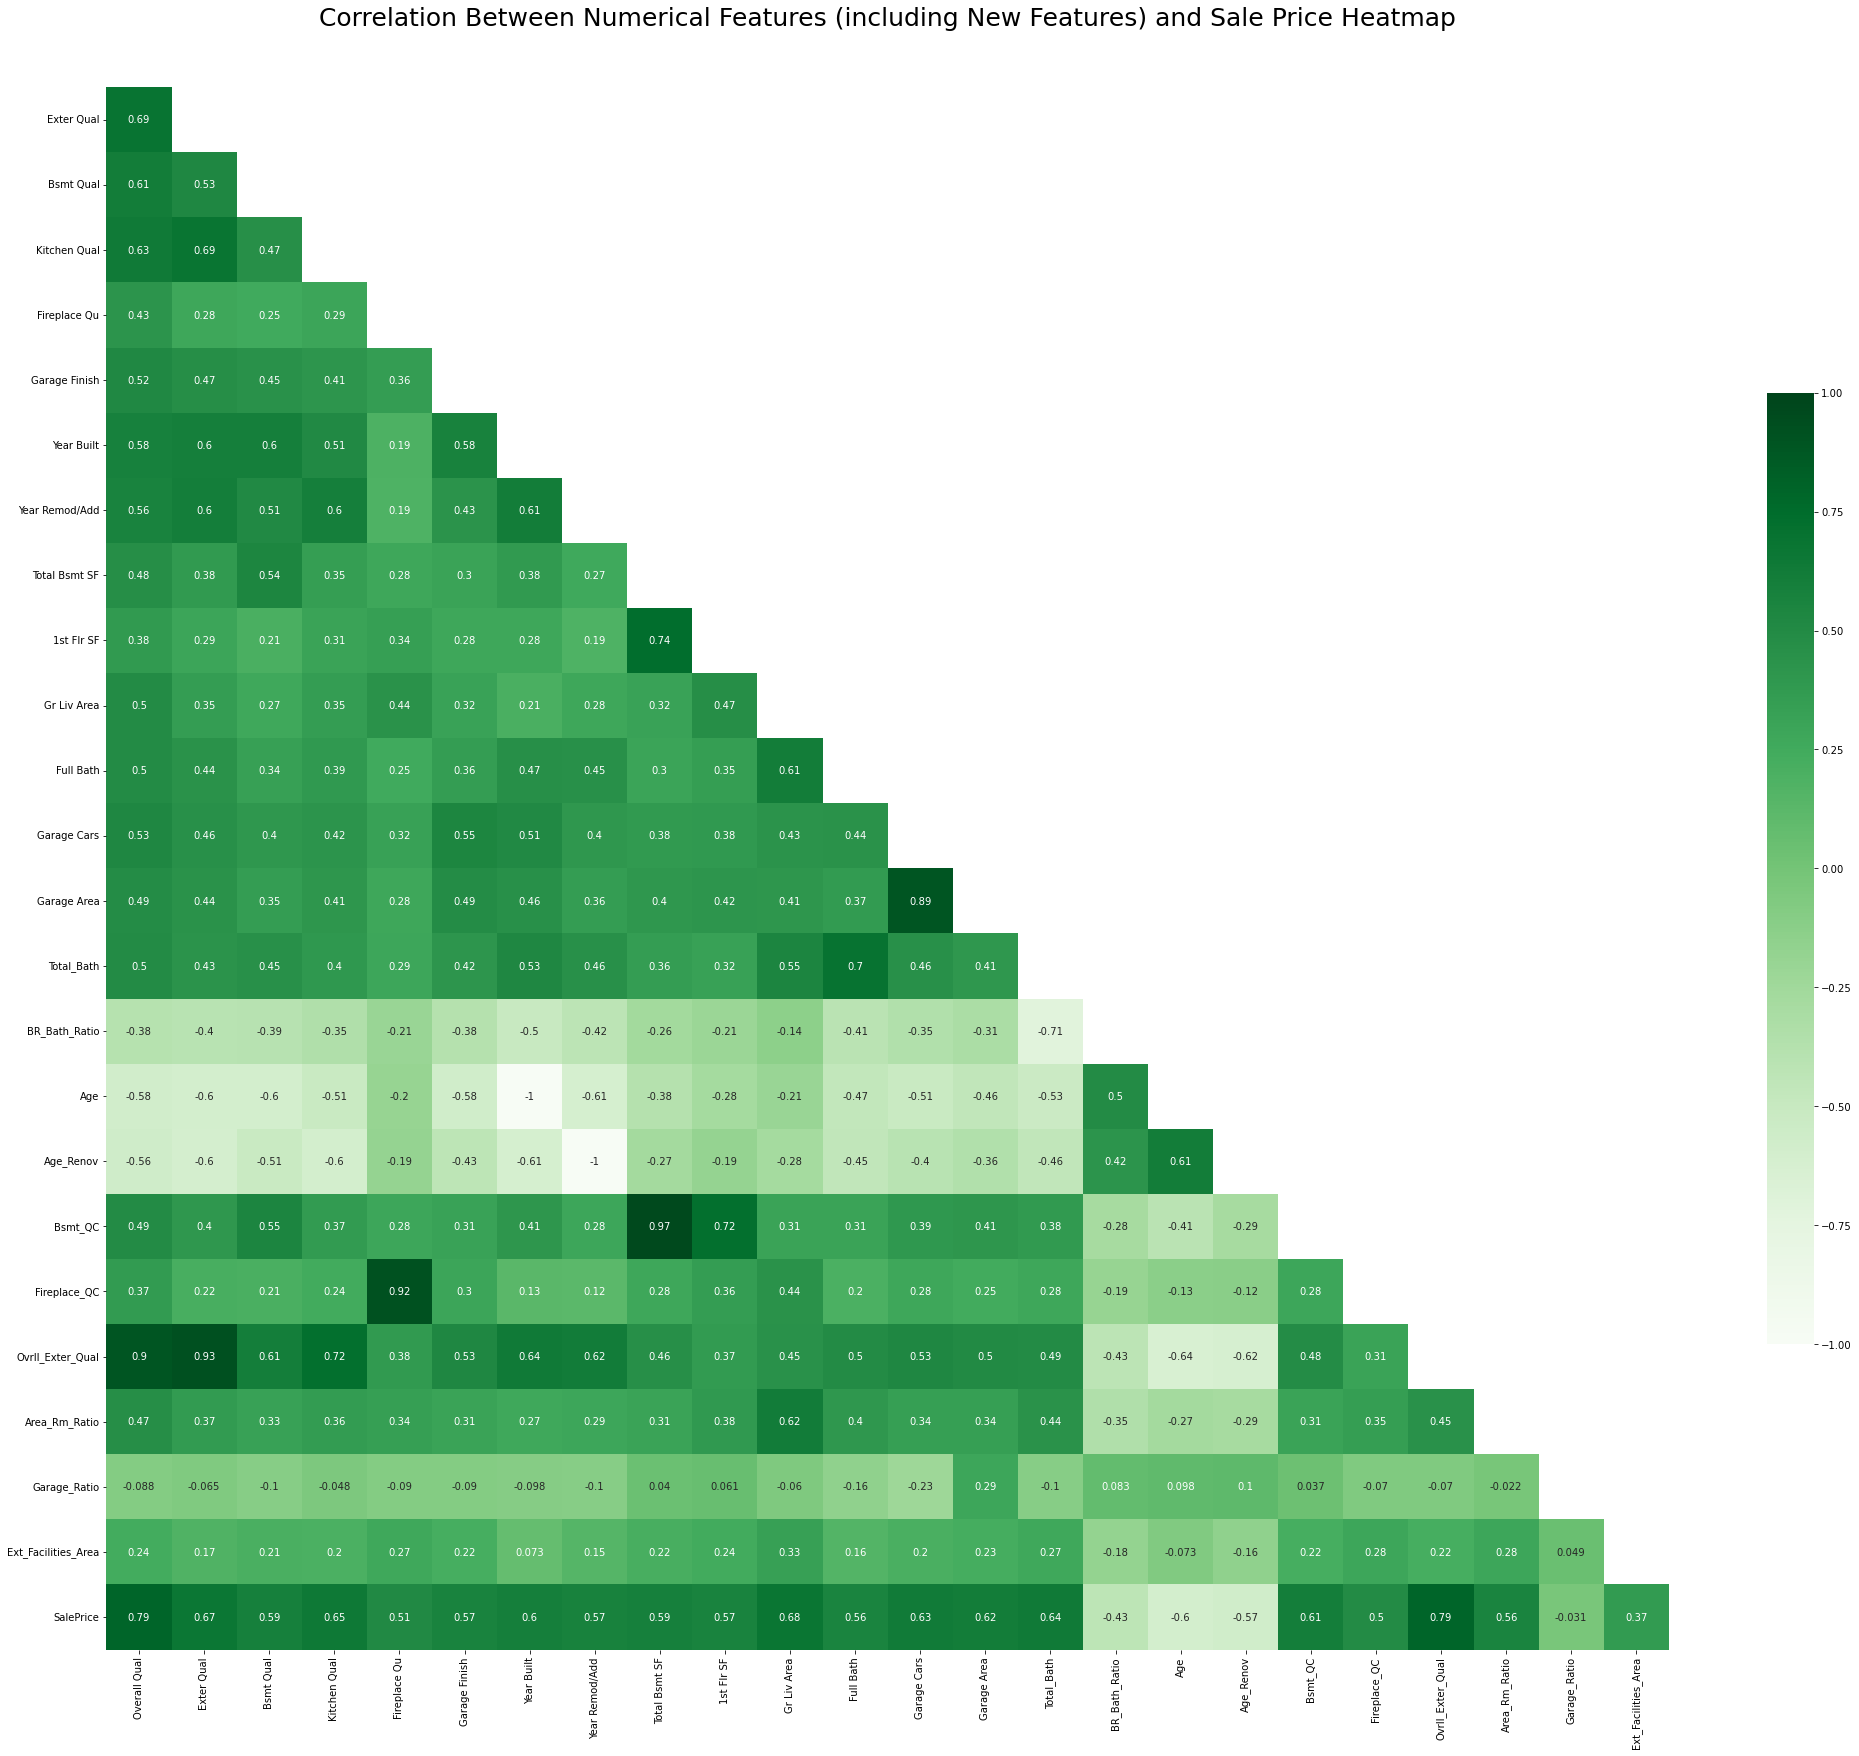

In [92]:
# create heatmap for all the pair in train_ordinals dataframe
plt.rcParams['figure.figsize'] = 35,35

upper_tri = np.triu(train_fts.corr()) #to return the upper triangle of a matrix

mask = upper_tri[1:, :-1]
corr = train_fts.corr().iloc[1:,:-1].copy()

sns.heatmap(corr, annot= True, square= True,
           vmin= -1, vmax= 1, center= 0, cmap= 'Greens', mask= mask,
           cbar_kws={"shrink": .5})

# title
title = 'Correlation Between Numerical Features (including New Features) and Sale Price Heatmap\n\n'
plt.title(title, size= 25)

**Observation :**  
- Age and Age_Renov has the same SalePrice correlation value with Year Built and Year Remod/Add, but they reflects better than the later, thus **Year Built** and **Year Remod/Add** will be dropped
- Total Bath has a better correlation with SalePrice than Full Bath, thus **Full Bath** will be dropped
- **BR_Bath_Ratio** does not have p value >= 0.5 thus it will be dropped
- Bsmt_QC has slightly better correlation than Total Bsmt SF only, thus it will remain and **Total Bsmt SF** will be dropped
- **Fireplace_QC** has lower correlation with SalePrice than Fireplace Qu, thus it will be dropped
- **Ovrll_Exter_Qual** do not show much improvement than Overall Qual metric, thus it will be dropped
- Area_Rm_Ratio will remain as it has high correlation
- **Garage_Ratio** has very low correlation, thus it and **Garage Cars** will be dropped since it is lower than Garage Area
- **Ext_Facilities_Area** will be dropped as well

##### 3.2.4 Exclude Non-Important Feature Columns

In [93]:
fts_2_drop = ['Year Built', 'Year Remod/Add', 'Full Bath', 'Total Bsmt SF', 'Garage Cars']

In [94]:
# drop nominal features that will not be considered for modelling from the dataframe
train_fts.drop(columns= fts_2_drop, inplace= True)

In [95]:
# list of new numerical features to be used
new_fts_keep = ['Total_Bath', 'Age', 'Age_Renov', 'Bsmt_QC', 'Area_Rm_Ratio']

In [96]:
fts_drop.extend(fts_2_drop)
fts_drop

['Fireplaces',
 'Heating QC',
 'TotRms AbvGrd',
 'BsmtFin SF 1',
 'BsmtFin Type 1',
 'Mas Vnr Area',
 'Open Porch SF',
 'Paved Drive',
 'Bsmt Exposure',
 'Garage Qual',
 'Garage Cond',
 'Wood Deck SF',
 'Lot Frontage',
 'Electrical',
 'Half Bath',
 '2nd Flr SF',
 'Lot Area',
 'Bsmt Cond',
 'Bsmt Full Bath',
 'Bsmt Unf SF',
 'Bedroom AbvGr',
 'Functional',
 'Screen Porch',
 'Exter Cond',
 'Pool QC',
 '3Ssn Porch',
 'Pool Area',
 'Utilities',
 'Mo Sold',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Misc Val',
 'Yr Sold',
 'Bsmt Half Bath',
 'Land Slope',
 'Overall Cond',
 'Low Qual Fin SF',
 'Kitchen AbvGr',
 'Enclosed Porch',
 'Fence',
 'Lot Shape',
 'Year Built',
 'Year Remod/Add',
 'Full Bath',
 'Total Bsmt SF',
 'Garage Cars']

In [97]:
print('Total numerical features to be dropped :',len(fts_drop))

fts_drop

Total numerical features to be dropped : 46


['Fireplaces',
 'Heating QC',
 'TotRms AbvGrd',
 'BsmtFin SF 1',
 'BsmtFin Type 1',
 'Mas Vnr Area',
 'Open Porch SF',
 'Paved Drive',
 'Bsmt Exposure',
 'Garage Qual',
 'Garage Cond',
 'Wood Deck SF',
 'Lot Frontage',
 'Electrical',
 'Half Bath',
 '2nd Flr SF',
 'Lot Area',
 'Bsmt Cond',
 'Bsmt Full Bath',
 'Bsmt Unf SF',
 'Bedroom AbvGr',
 'Functional',
 'Screen Porch',
 'Exter Cond',
 'Pool QC',
 '3Ssn Porch',
 'Pool Area',
 'Utilities',
 'Mo Sold',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Misc Val',
 'Yr Sold',
 'Bsmt Half Bath',
 'Land Slope',
 'Overall Cond',
 'Low Qual Fin SF',
 'Kitchen AbvGr',
 'Enclosed Porch',
 'Fence',
 'Lot Shape',
 'Year Built',
 'Year Remod/Add',
 'Full Bath',
 'Total Bsmt SF',
 'Garage Cars']

In [98]:
# drop numerical features that will not be considered for modelling from the dataframe
train_data.drop(columns= fts_drop, inplace= True, errors= 'ignore')

In [99]:
train_data = pd.concat([train_data, train_fts[new_fts_keep]], axis= 1, copy= False)
train_data = SalePricetoLast(train_data)
train_data.head()

,Overall Qual,Exter Qual,Bsmt Qual,1st Flr SF,Gr Liv Area,Kitchen Qual,Fireplace Qu,Garage Finish,Garage Area,Mas Vnr Avail,House_Style_1Story,House_Style_2Story,House_Style_Others,Foundation__CBlock,Foundation__Others,Foundation__PConc,Area_Side_East,Area_Side_North,Area_Side_South,Area_Side_West,Total_Bath,Age,Age_Renov,Bsmt_QC,Area_Rm_Ratio,SalePrice
0,6.0,3.0,3.0,725,1479,3.0,0.0,2.0,475.0,1,0,1,0,1,0,0,0,0,0,1,2.5,34,5,2175.0,246.50,130500
1,7.0,3.0,4.0,913,2122,3.0,3.0,2.0,559.0,1,0,1,0,0,0,1,0,0,0,1,3.5,13,12,2739.0,265.25,220000
2,5.0,2.0,3.0,1057,1057,3.0,0.0,1.0,246.0,0,1,0,0,1,0,0,0,1,0,0,2.0,57,3,3171.0,211.40,109000
3,5.0,2.0,4.0,744,1444,2.0,0.0,3.0,400.0,0,0,1,0,0,0,1,0,0,1,0,2.5,4,3,1152.0,206.29,174000
4,6.0,2.0,2.0,831,1445,2.0,0.0,1.0,484.0,0,0,0,1,0,0,1,0,0,0,1,2.0,110,17,2704.0,240.83,138500


In [100]:
train_data.shape

(1954, 26)

In [101]:
train_data.to_csv('datasets/train_data.csv', index=False)

### 4. Model Prepping

#### 4.1 Create Feature Matrix (X) and target vector (y)

In [102]:
# load all the selected features exluding the SalePrice
features = [col for col in train_data.columns if col != 'SalePrice']
X = train_data[features]
y = train_data['SalePrice']

#### 4.2 Train/Test Split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#### 4.3 Scaling

In [104]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

#### 4.4 Instantiate Our Model

##### 4.4.1 Linear Regression

In [105]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

##### 4.4.2 Lasso Regression

In [106]:
lassocv = LassoCV(n_alphas=200)

In [107]:
lassocv.fit(X_train, y_train)

LassoCV(n_alphas=200)

In [108]:
# finding the optimal alpha for lasso
opt_alpha_lasso = lassocv.alpha_
opt_alpha_lasso

47.14126387695314

In [109]:
lasso = Lasso(alpha= opt_alpha_lasso, random_state= 42)

In [110]:
lasso.fit(X_train, y_train)

Lasso(alpha=47.14126387695314, random_state=42)

##### 4.4.3 Ridge Regression

In [111]:
ridge_alphas = np.logspace(0, 5, 200)

In [112]:
ridgecv = RidgeCV(alphas=ridge_alphas)

In [113]:
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.05956018e+00, 1.12266777e+00, 1.18953407e+00,
       1.26038293e+00, 1.33545156e+00, 1.41499130e+00, 1.49926843e+00,
       1.58856513e+00, 1.68318035e+00, 1.78343088e+00, 1.88965234e+00,
       2.00220037e+00, 2.12145178e+00, 2.24780583e+00, 2.38168555e+00,
       2.52353917e+00, 2.67384162e+00, 2.83309610e+00, 3.00183581e+00,
       3.18062569e+00, 3.37006433e+0...
       2.64308149e+04, 2.80050389e+04, 2.96730241e+04, 3.14403547e+04,
       3.33129479e+04, 3.52970730e+04, 3.73993730e+04, 3.96268864e+04,
       4.19870708e+04, 4.44878283e+04, 4.71375313e+04, 4.99450512e+04,
       5.29197874e+04, 5.60716994e+04, 5.94113398e+04, 6.29498899e+04,
       6.66991966e+04, 7.06718127e+04, 7.48810386e+04, 7.93409667e+04,
       8.40665289e+04, 8.90735464e+04, 9.43787828e+04, 1.00000000e+05]))

In [114]:
opt_alpha_ridge = ridgecv.alpha_
opt_alpha_ridge

2.3816855519761586

In [115]:
ridge = Ridge(alpha= opt_alpha_ridge, random_state= 42)

In [116]:
ridge.fit(X_train, y_train)

Ridge(alpha=2.3816855519761586, random_state=42)

#### 4.5 Cross Validation

In [117]:
# linear regression with cross validation RMSE score
lr_scores = np.sqrt(-cross_val_score(lr, X_train, y_train, cv=5, scoring= 'neg_mean_squared_error'))
lr_scores.mean()

22861.670513625653

In [118]:
# linear regression with cross validation R2 score
cross_val_score(lr, X_train, y_train, cv=5).mean()

0.8528552786965136

In [119]:
# lasso regression with cross validation RMSE score
lasso_scores = np.sqrt(-cross_val_score(lasso, X_train, y_train, cv=5, scoring= 'neg_mean_squared_error'))
lasso_scores.mean()

22870.32386490424

In [120]:
# lasso regression with cross validation R2 score
cross_val_score(lasso, X_train, y_train, cv=5).mean()

0.852721939655078

In [121]:
# ridge regression with cross validation RMSE score
ridge_scores = np.sqrt(-cross_val_score(ridge, X_train, y_train, cv=5, scoring= 'neg_mean_squared_error'))
ridge_scores.mean()

22853.98218634641

In [122]:
# ridge regression with cross validation R2 score
cross_val_score(ridge, X_train, y_train, cv=5).mean()

0.8529519136611391

### 5. Predictions

In [123]:
lr_pred = lr.predict(X_test)

In [124]:
rmse_lr = np.sqrt(mean_squared_error(lr_pred, y_test))
rmse_lr

22393.560429156092

In [125]:
r2_score(lr_pred, y_test)

0.8263042893374128

In [126]:
lasso_pred = lasso.predict(X_test)

In [127]:
rmse_lasso = np.sqrt(mean_squared_error(lasso_pred, y_test))
rmse_lasso

22393.201785395664

In [128]:
r2_score(lasso_pred, y_test)

0.8257429176434046

In [129]:
ridge_pred = ridge.predict(X_test)

In [130]:
rmse_ridge = np.sqrt(mean_squared_error(ridge_pred, y_test))
rmse_ridge

22392.093907222046

In [131]:
r2_score(ridge_pred, y_test)

0.8261542771379139

From the prediction, we can infer that **ridge regression** has a better predictor as per our selected features with RMSE of 22392.09. Therefore, we would proceed to check coeffcient value for ridge regression.

#### 5.1 Ridge Regression Coefficient Value

In [132]:
# Create df for storing coefficients and their corresponding variable names
coefficient_df = pd.DataFrame()

# Storing all the column names of predictors
coefficient_df['Column_Name'] = train_data.columns

# Store coefficients of predictors
coefficient_df['Coefficient_Value'] = pd.Series(ridge.coef_)

coefficient_df.set_index('Column_Name', inplace= True)
coefficient_df.sort_values(by= 'Coefficient_Value', key= abs, ascending= False, inplace= True)
coefficient_df.drop(index= 'SalePrice', inplace= True)

# Preview variables' coefficient values
# The higher the values, the stronger the variables
coefficient_df

,Coefficient_Value
Column_Name,
Gr Liv Area,16364.068297
Overall Qual,11599.657771
Area_Side_North,11582.111073
Area_Side_South,9559.462644
Area_Side_West,9552.251957
Bsmt_QC,7413.814513
Area_Side_East,6820.600887
Garage Area,6318.207223
Kitchen Qual,5844.313699


Text(0, 0.5, 'Feature')

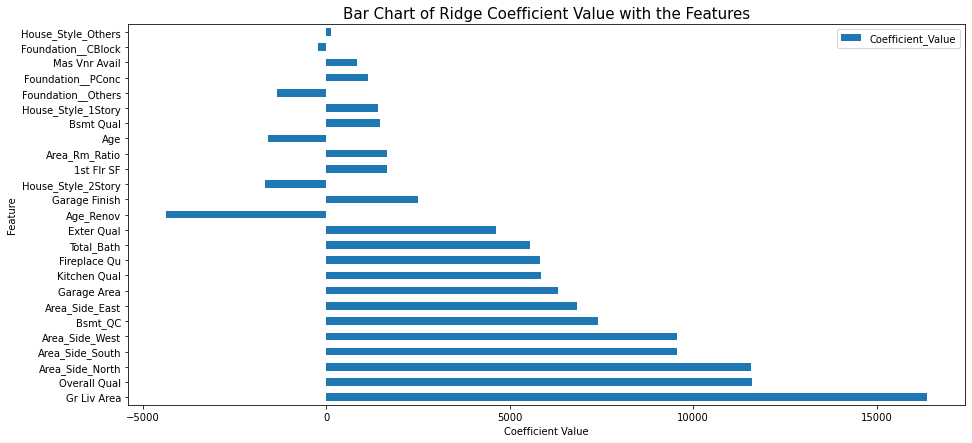

In [133]:
coefficient_df.plot.barh(figsize=(15, 7))

plt.title('Bar Chart of Ridge Coefficient Value with the Features', size= 15)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')

**Observation :** The top 10 features with high coefficient value:
1. Gr Liv Area, every additional sqft, the price increase by 16,364 dollars  
2. Overall Qual, property increase by 11,599 dollars for every point increase in overall quality
3. Location, with additional of 11,582 dollars if the location is at North side, the highest out of all area
4. Bsmt_QC, property price increase by 7,413 dollars every increase in basement area x quality
5. Garage Area, every additional sqft, the price increase by 6,318 dollars
6. Kitchen Quality, property price increase by 5,844 dollars for every point increase in quality 
7. Fireplace Quality, property price increase by 5,810 dollars for every point increase in quality 
8. Total Bath, property price increase by 5,548 dollars every toilet found in the property
9. External Quality, property price increase by 4,614 dollars for every point increase in quality
10. Age after last Renovation, property price will decrease by 4,366 dollars if the age increases
  
Interesting findings:
1. Poured Concrete foundation has a higher value compared to Cinder Block foundation
2. 1st Story House is valued highest compared to other type

In [134]:
residual = y_test - ridge_pred

Text(0, 0.5, 'Residual')

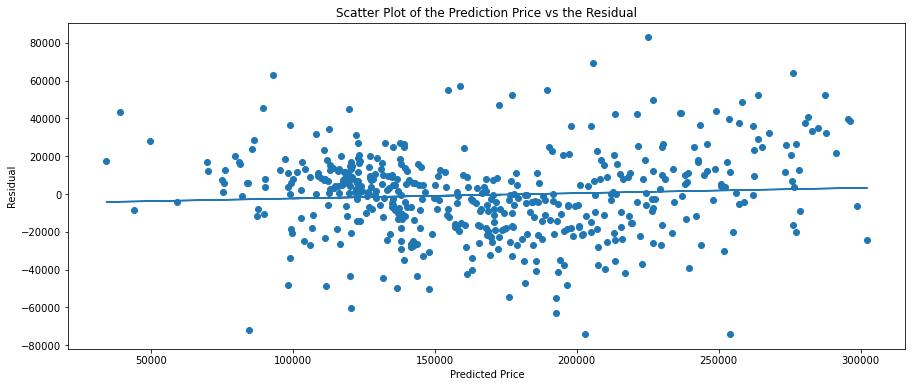

In [135]:
plt.rcParams['figure.figsize'] = 15,6
plt.scatter(ridge_pred, residual)

m, b = np.polyfit(ridge_pred, residual, 1)
plt.plot(ridge_pred, m*ridge_pred + b)

plt.title('Scatter Plot of the Prediction Price vs the Residual')
plt.xlabel('Predicted Price')
plt.ylabel('Residual')

**Observation :** The residual have a range from 80,000 to -80,0000 and the trend line runs near the x-axis which indicates a fairly high accuracy in the prediction

Text(0, 0.5, 'Actual Price')

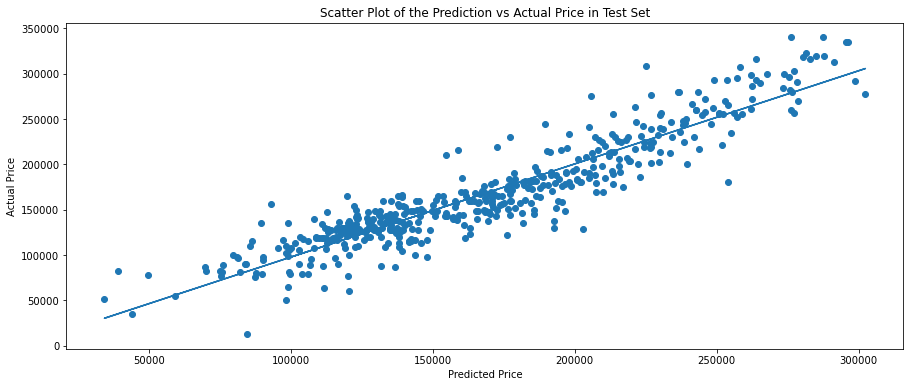

In [136]:
plt.rcParams['figure.figsize'] = 15,6
plt.scatter(ridge_pred, y_test)

m, b = np.polyfit(ridge_pred, y_test, 1)
plt.plot(ridge_pred, m*ridge_pred + b)

plt.title('Scatter Plot of the Prediction vs Actual Price in Test Set')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')

**Observation :**
- The scatter plot data does not exactly follow the regression line, we can see that it has a bit of curvature based on the scatter data
- There are more data where the price is at the lower range

#### 5.2 Base Model Comparison

In [137]:
#base model prediction with y_train mean
base_pred = [y_train.mean() for i in range(len(y_test))] 

In [138]:
# RMSE for the base_pred and y_test
rmse_base = np.sqrt(mean_squared_error(base_pred, y_test))
rmse_base

59638.238918412084

In [139]:
improve = (rmse_base - rmse_ridge)/rmse_base
improve

0.624534622193397

We have **62.5%** improvement in the RMSE based on the ridge regression and the selected features 

### 6. Conclusion & Recommendation

#### 6.1 Conclusion  
- Ridge regression has the best fit for the features and dataset
- Area of the interior has a big part in determining the Sale Price
- The location which has the highest price value would be at the North Area
- Kitchen and Fireplace also play big part in the Sale Price
- The more the bathroom is the higher the property is valued
- Renovation will help to increase the price as well

#### 6.2 Limitation  
- The time range of the data only include transaction from 2006 to 2010
- The data only includes the transaction in the city of Ames
- Most of the features have a skewed data where one type of the value hold the majority counts

#### 6.3 Future Works  
- Implement the model to the latest transaction data to check if the trends still holds
- Implement the model with the data from other city in the United States to get overview trends for US
- Implement the model with variability on the value, especially the nominal and categorical features

#### 6.4 Recommendation  
For buyers:
- To invest in renovation 
- To purchase (for investment):
 > - A bigger living area
 > - House located in the North of Iowa State University
 > - House with higher basement
 - For budget constraint, can go for property at the East for relative cheaper price

For sellers:
- To highlight the quality of the house
- To highlight the basement quality and area
- To ask for a better price if the house is at the North side and has big living area